# Laboratorio 8 
    - Francis Aguilar - 22243
    - César López - 22535
    - Angela García -22869 


enlace al repositorio: https://github.com/angelargd8/lab8-ds


In [2]:
import pandas as pd

# Cargar el archivo
excel_path = "/opt/app/working_dir/principales.xlsx"
xls = pd.ExcelFile(excel_path)

# Ver nombres de las hojas
print(xls.sheet_names)


['Portada-Presentación', 'Índice', 'Directorio ', 'Procedimiento', 'cuadro 1', 'cuadro 2', 'cuadro 3', 'cuadro 4', 'cuadro 5', 'cuadro 6', 'cuadro 7', 'cuadro 8', 'cuadro 9', 'cuadro 10', 'cuadro 11', 'cuadro 12', 'cuadro 13', 'cuadro 14', 'cuadro 15', 'cuadro 16', 'cuadro 17', 'cuadro 18', 'cuadro 19', 'cuadro 20', 'cuadro 21', 'cuadro 22', 'cuadro 23', 'cuadro 24', 'cuadro 25', 'cuadro 26', 'cuadro 27', 'cuadro 28', 'cuadro 29', 'cuadro 30', 'cuadro 31', 'cuadro 32', 'cuadro 33', 'cuadro 34', 'cuadro 35', 'cuadro 36', 'cuadro 37', 'cuadro 38', 'cuadro 39', 'cuadro 40', 'cuadro 41', 'cuadro 42', 'cuadro 43', 'cuadro 44', 'cuadro 45', 'cuadro 46', 'cuadro 47', 'cuadro 48', 'cuadro 49', 'cuadro 50', 'cuadro 51', 'cuadro 52', 'cuadro 53', 'cuadro 54', 'cuadro 55', 'cuadro 56', 'cuadro 57', 'cuadro 58', 'cuadro 59', 'cuadro 60', 'cuadro 61', 'cuadro 62', 'cuadro 63', 'cuadro 64', 'cuadro 65', 'Nota técnica', 'Ficha técnica']


In [3]:
import pandas as pd

excel_path = "/opt/app/working_dir/principales.xlsx"


header_list = ["departamento", "vehículo", "vehiculo", "mes de ocurrencia","día de la semana", "día de ocurrencia","hora de ocurrencia","condición del conductor y sexo","grupos de edad", "tipo de vehículo y sexo de la persona", "zona de ocurrencia", "tipo de accidente y sexo"  ,"tipo", "clase", "marca", "modelo de vehículo", "sexo", "grupo", "edad","tipo de vehículo", "clases de vehículos", "color de vehículo" ]

def read_cuadro(sheet_num, categoria):
    sheet = f"cuadro {sheet_num}"
    raw = pd.read_excel(excel_path, sheet_name=sheet, header=None)

    header_idx = None

    for i, row in enumerate(raw.values):
        row = raw.iloc[i].astype(str).str.lower()
        if any(word in row.tolist() for word in header_list):
            header_idx = i
            break

    if header_idx is None:
        return None

    # Tomo la fila de encabezados
    header_row = raw.iloc[header_idx].tolist()
    # Tomo la fila siguiente (por si son los años / meses / días)
    next_row = raw.iloc[header_idx + 1].tolist()

    # Combinar: si la celda en header_row está vacía, usar la de next_row
    combined_header = []
    for h, n in zip(header_row, next_row):
        if pd.isna(h) or str(h).strip() == "":
            combined_header.append(n)
        elif str(h).lower() in ["año de ocurrencia", "mes de ocurrencia","tipo de accidente", "día de la semana", "total","hombre","mujer","ignorado","grupos de edad"]:
            combined_header.append(n)  # usar el detalle
        else:
            combined_header.append(h)

    # Extraer datos desde dos filas después
    df = raw.iloc[header_idx + 2:].copy()
    df.columns = combined_header

    # Quitar filas vacías y ruido
    df = df.dropna(how="all")
    df = df[~df.iloc[:,0].astype(str).str.contains("fuente|nota|cuadro|serie", case=False, na=False)]

    # Limpiar nombres de columnas
    df.columns = [str(c).strip() for c in df.columns]

    # Agregar metadata
    df["categoria"] = categoria
    df["cuadro"] = sheet_num

    # Limpiar filas basura
    # Quitar filas con primera columna vacía
    df = df[df.iloc[:,0].notna() & (df.iloc[:,0].astype(str).str.strip() != "")]
    
    # Quitar filas completamente vacías en todas las columnas excepto metadata
    cols_sin_meta = df.columns.difference(["categoria", "cuadro"])
    df = df.dropna(subset=cols_sin_meta, how="all")
    
    return df

def build_dict(rango, categoria):
    cuadros = {}
    for i in rango:
        try:
            df = read_cuadro(i, categoria)
            if df is not None:
                cuadros[f"{categoria}_{i}"] = df
        except Exception as e:
            print(f"Error en cuadro {i}: {e}")
    return cuadros

# Procesar
hechos_dfs = build_dict(range(1, 17), "hechos")
vehiculos_dfs  = build_dict(range(17, 29), "vehiculos")
lesionados_dfs = build_dict(range(31, 47), "lesionados")
fallecidos_dfs = build_dict(range(47, 63), "fallecidos")

# Verificar cuáles cuadros se cargaron
print(list(hechos_dfs.keys()))
print(list(vehiculos_dfs.keys()))
print(list(lesionados_dfs.keys()))
print(list(fallecidos_dfs.keys()))

# mostrar el primero 
print(hechos_dfs["hechos_1"].head())
#print(vehiculos_dfs["vehiculos_17"].head())
#print(lesionados_dfs["lesionados_32"].head())
#print(fallecidos_dfs["fallecidos_48"].head())


    

['hechos_1', 'hechos_2', 'hechos_3', 'hechos_4', 'hechos_5', 'hechos_6', 'hechos_7', 'hechos_8', 'hechos_9', 'hechos_10', 'hechos_11', 'hechos_12', 'hechos_13', 'hechos_14', 'hechos_15', 'hechos_16']
['vehiculos_17', 'vehiculos_18', 'vehiculos_19', 'vehiculos_20', 'vehiculos_21', 'vehiculos_22', 'vehiculos_23', 'vehiculos_24', 'vehiculos_25', 'vehiculos_26', 'vehiculos_27', 'vehiculos_28']
['lesionados_31', 'lesionados_32', 'lesionados_33', 'lesionados_34', 'lesionados_35', 'lesionados_36', 'lesionados_37', 'lesionados_38', 'lesionados_39', 'lesionados_40', 'lesionados_41', 'lesionados_42', 'lesionados_43', 'lesionados_44', 'lesionados_45', 'lesionados_46']
['fallecidos_47', 'fallecidos_48', 'fallecidos_49', 'fallecidos_50', 'fallecidos_51', 'fallecidos_52', 'fallecidos_53', 'fallecidos_54', 'fallecidos_55', 'fallecidos_56', 'fallecidos_57', 'fallecidos_58', 'fallecidos_59', 'fallecidos_60', 'fallecidos_61', 'fallecidos_62']
     Departamento  2020  2021.0  2022.0  2023.0  2024.0  nan 

In [4]:
#hechos_dfs["hechos_8"].to_csv("hechos8.csv", index=False, encoding="utf-8")
#fallecidos_dfs["fallecidos_53"].to_csv("fallecidos_53.csv", index=False, encoding="utf-8")
##print(vehiculos_dfs["vehiculos_18"].head())
#vehiculos_dfs["vehiculos_18"].to_csv("vehiculos_18.csv", index=False, encoding="utf-8")
#fallecidos_dfs["fallecidos_48"].to_csv("fallecidos_48.csv", index=False, encoding="utf-8")
#lesionados_dfs["lesionados_40"].to_csv("lesionados_40.csv", index=False, encoding="utf-8")

In [5]:
from pyspark.sql import SparkSession

# creacion de la aplicacion
spark = SparkSession.getActiveSession() or SparkSession.builder.appName("MiApp").getOrCreate()
sc = spark.sparkContext

/usr/local/lib/python3.11/site-packages/pyspark/bin/load-spark-env.sh: line 68: ps: command not found
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/02 12:59:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


1. Mostrar cuántos registros hay en cada tabla (hechos, vehículos, fallecidos, 
lesionados). Muestre algunos resultados con la función .show(). Genere un describe y 
summary para aquellas columnas que considere importantes según cada archivo.


In [6]:
import re
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.types import NumericType
from pyspark.sql import functions as F

spark = SparkSession.builder.getOrCreate()

# ---------- Utilidades ----------
def safe_col(name: str) -> str:
    n = str(name).strip()
    n = re.sub(r'\.0$', '', n)              # 2021.0 -> 2021
    n = n.replace('%', 'pct')
    n = re.sub(r'\s+', '_', n)              # espacios -> _
    n = re.sub(r'[^0-9a-zA-Z_]', '_', n)    # símbolos raros -> _
    if re.match(r'^\d', n):                 # si inicia con dígito, prefijo
        n = f'y{n}'
    return n

def make_unique(cols):
    seen = {}
    out = []
    for c in cols:
        base = c if c else "col"
        if base not in seen:
            seen[base] = 0
            out.append(base)
        else:
            seen[base] += 1
            out.append(f"{base}_{seen[base]}")
    return out

def to_scalar(x):
    # Convierte contenedores a texto; deja escalares tal cual
    if isinstance(x, (list, dict, tuple, set)):
        return str(x)
    return x

COLUMNAS_CATEG_POSIBLES = [
    "departamento","vehículo","vehiculo","tipo","clase","marca","modelo",
    "sexo","grupo","edad"
]

# ---------- Pipeline ----------
for key, df in hechos_dfs.items():
    # 1) quitar filas 'total'
    mask_total = df.apply(lambda r: r.astype(str).str.strip().str.lower().eq('total').any(), axis=1)
    df_clean = df.loc[~mask_total].copy()

    # 2) normalizar nombres y asegurar únicos
    df_clean.columns = [safe_col(c) for c in df_clean.columns]
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean.columns = make_unique(df_clean.columns)

    # 3) forzar TODO a escalar seguro (evita dicts/listas en celdas)
    df_clean = df_clean.applymap(to_scalar)

    # 4) tipificación robusta: si >=80% es numérico -> Double; si no, String
    col_is_numeric = {}
    for c in df_clean.columns:
        ser = pd.to_numeric(df_clean[c], errors="coerce")
        numeric_ratio = ser.notna().mean() if len(ser) else 0.0
        if numeric_ratio >= 0.8:  # umbral 80%
            df_clean[c] = ser.astype(float)  # NaN quedará como NaN (luego lo pasamos a None)
            col_is_numeric[c] = True
        else:
            # pandas string nativo; luego convertimos <NA>/NaN a None
            df_clean[c] = df_clean[c].where(pd.notnull(df_clean[c]), None).astype("string")
            col_is_numeric[c] = False

    # 5) NaN -> None (para Spark)
    df_clean = df_clean.where(pd.notnull(df_clean), None)

    # 6) construir schema explícito (Double para numéricas, String para el resto)
    schema = StructType([
        StructField(c, DoubleType() if col_is_numeric.get(c, False) else StringType(), True)
        for c in df_clean.columns
    ])

    # 7) crear Spark DF con schema fijo (evita CANNOT_MERGE_TYPE)
    sdf = spark.createDataFrame(df_clean.astype(object), schema=schema)

    print(f"\n=== {key} :: sdf.show(10) ===")
    sdf.show(10, truncate=False)

    # 8) describe/summary para numéricas
    num_cols = [f.name for f in sdf.schema.fields if isinstance(f.dataType, NumericType)]
    if num_cols:
        print(f"\n--- {key} :: describe (numéricas) ---")
        sdf.select(*num_cols).describe().show(truncate=False)

        print(f"\n--- {key} :: summary (numéricas) ---")
        sdf.select(*num_cols).summary("count","mean","stddev","min","25%","50%","75%","max").show(truncate=False)
    else:
        print(f"\n--- {key} :: no hay columnas numéricas detectadas ---")

    # 9) top categorías para columnas importantes (si existen)
    for c in [safe_col(c) for c in COLUMNAS_CATEG_POSIBLES]:
        if c in sdf.columns:
            print(f"\n--- {key} :: top categorías en '{c}' ---")
            sdf.groupBy(F.col(c).cast("string")).count().orderBy(F.desc("count")).show(10, truncate=False)


/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)



=== hechos_1 :: sdf.show(10) ===


+--------------+------+------+------+------+------+---------+------+
|Departamento  |y2020 |y2021 |y2022 |y2023 |y2024 |categoria|cuadro|
+--------------+------+------+------+------+------+---------+------+
|Guatemala     |2676.0|3450.0|3387.0|3457.0|3408.0|hechos   |1.0   |
|El Progreso   |124.0 |170.0 |147.0 |173.0 |182.0 |hechos   |1.0   |
|Sacatepéquez  |202.0 |270.0 |325.0 |325.0 |366.0 |hechos   |1.0   |
|Chimaltenango |229.0 |297.0 |297.0 |300.0 |299.0 |hechos   |1.0   |
|Escuintla     |440.0 |615.0 |695.0 |930.0 |1123.0|hechos   |1.0   |
|Santa Rosa    |197.0 |238.0 |231.0 |272.0 |233.0 |hechos   |1.0   |
|Sololá        |81.0  |109.0 |68.0  |72.0  |73.0  |hechos   |1.0   |
|Totonicapán   |49.0  |77.0  |82.0  |40.0  |49.0  |hechos   |1.0   |
|Quetzaltenango|197.0 |253.0 |239.0 |232.0 |218.0 |hechos   |1.0   |
|Suchitepéquez |201.0 |229.0 |215.0 |187.0 |194.0 |hechos   |1.0   |
+--------------+------+------+------+------+------+---------+------+
only showing top 10 rows


--- hec

25/10/02 12:59:35 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+-----------------+------------------+-----------------+------+
|summary|y2020            |y2021             |y2022            |y2023             |y2024            |cuadro|
+-------+-----------------+------------------+-----------------+------------------+-----------------+------+
|count  |22               |22                |22               |22                |22               |22    |
|mean   |288.6363636363636|370.59090909090907|360.1818181818182|373.54545454545456|381.8636363636364|1.0   |
|stddev |539.6195790029213|696.6505347248847 |688.4987558424029|710.96893825879   |709.2413985885635|0.0   |
|min    |49.0             |77.0              |68.0             |40.0              |49.0             |1.0   |
|max    |2676.0           |3450.0            |3387.0           |3457.0            |3408.0           |1.0   |
+-------+-----------------+------------------+-----------------+------------------+-----------------+------+


--- hechos_1 :: s

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+-----+-------+-----+-----+-----+-----+-----+------+----------+-------+---------+---------+---------+------+
|Departamento  |nan   |Enero|Febrero|Marzo|Abril|Mayo |Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|Diciembre|categoria|cuadro|
+--------------+------+-----+-------+-----+-----+-----+-----+-----+------+----------+-------+---------+---------+---------+------+
|Guatemala     |3408.0|263.0|296.0  |289.0|250.0|268.0|236.0|311.0|277.0 |255.0     |293.0  |334.0    |336.0    |hechos   |2.0   |
|El Progreso   |182.0 |12.0 |9.0    |16.0 |13.0 |19.0 |11.0 |15.0 |13.0  |13.0      |16.0   |21.0     |24.0     |hechos   |2.0   |
|Sacatepéquez  |366.0 |27.0 |28.0   |27.0 |32.0 |18.0 |23.0 |33.0 |30.0  |43.0      |38.0   |27.0     |40.0     |hechos   |2.0   |
|Chimaltenango |299.0 |25.0 |28.0   |23.0 |22.0 |29.0 |18.0 |19.0 |21.0  |32.0      |28.0   |28.0     |26.0     |hechos   |2.0   |
|Escuintla     |1123.0|81.0 |96.0   |122.0|91.0 |91.0 |59.0 |76.0 |106.0 |97.0     

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+-----+------+---------+------+-------+------+-------+---------+------+
|Departamento  |nan   |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria|cuadro|
+--------------+------+-----+------+---------+------+-------+------+-------+---------+------+
|Guatemala     |3408.0|447.0|382.0 |363.0    |409.0 |516.0  |679.0 |612.0  |hechos   |3.0   |
|El Progreso   |182.0 |21.0 |22.0  |19.0     |25.0  |19.0   |40.0  |36.0   |hechos   |3.0   |
|Sacatepéquez  |366.0 |45.0 |46.0  |43.0     |46.0  |40.0   |75.0  |71.0   |hechos   |3.0   |
|Chimaltenango |299.0 |37.0 |33.0  |40.0     |30.0  |36.0   |58.0  |65.0   |hechos   |3.0   |
|Escuintla     |1123.0|163.0|133.0 |112.0    |135.0 |151.0  |198.0 |231.0  |hechos   |3.0   |
|Santa Rosa    |233.0 |37.0 |32.0  |14.0     |29.0  |34.0   |50.0  |37.0   |hechos   |3.0   |
|Sololá        |73.0  |13.0 |9.0   |5.0      |11.0  |7.0    |10.0  |18.0   |hechos   |3.0   |
|Totonicapán   |49.0  |3.0  |11.0  |6.0      |7.0   |8.0    

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------+-----+-----+-----+-----+-----+---------+------+
|nan       |y2020|y2021|y2022|y2023|y2024|categoria|cuadro|
+----------+-----+-----+-----+-----+-----+---------+------+
|Enero     |610.0|695.0|714.0|696.0|626.0|hechos   |4.0   |
|Febrero   |670.0|626.0|614.0|683.0|711.0|hechos   |4.0   |
|Marzo     |590.0|657.0|727.0|635.0|780.0|hechos   |4.0   |
|Abril     |329.0|644.0|632.0|938.0|630.0|hechos   |4.0   |
|Mayo      |374.0|701.0|671.0|696.0|674.0|hechos   |4.0   |
|Junio     |372.0|625.0|554.0|647.0|549.0|hechos   |4.0   |
|Julio     |405.0|614.0|683.0|640.0|703.0|hechos   |4.0   |
|Agosto    |571.0|643.0|624.0|605.0|687.0|hechos   |4.0   |
|Septiembre|495.0|648.0|612.0|615.0|686.0|hechos   |4.0   |
|Octubre   |591.0|691.0|628.0|615.0|747.0|hechos   |4.0   |
+----------+-----+-----+-----+-----+-----+---------+------+
only showing top 10 rows


--- hechos_4 :: describe (numéricas) ---
+-------+------------------+-----------------+-----------------+------------------+---------

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|nan       |nan_1|Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria|cuadro|
+----------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|Enero     |626.0|107.0|69.0  |69.0     |80.0  |72.0   |129.0 |100.0  |hechos   |5.0   |
|Febrero   |711.0|81.0 |89.0  |74.0     |109.0 |92.0   |139.0 |127.0  |hechos   |5.0   |
|Marzo     |780.0|109.0|89.0  |74.0     |80.0  |123.0  |146.0 |159.0  |hechos   |5.0   |
|Abril     |630.0|97.0 |87.0  |73.0     |64.0  |76.0   |115.0 |118.0  |hechos   |5.0   |
|Mayo      |674.0|94.0 |58.0  |92.0     |74.0  |128.0  |114.0 |114.0  |hechos   |5.0   |
|Junio     |549.0|57.0 |62.0  |50.0     |70.0  |66.0   |100.0 |144.0  |hechos   |5.0   |
|Julio     |703.0|105.0|104.0 |83.0     |76.0  |89.0   |116.0 |130.0  |hechos   |5.0   |
|Agosto    |687.0|82.0 |66.0  |65.0     |104.0 |105.0  |149.0 |116.0  |hechos   |5.0   |
|Septiembre|686.0|93.

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+---------+------+------+------+------+------+----------------------------------------------------------+---------+------+
|nan      |y2020 |y2021 |y2022 |y2023 |y2024 |nan_1                                                     |categoria|cuadro|
+---------+------+------+------+------+------+----------------------------------------------------------+---------+------+
|Lunes    |880.0 |1064.0|971.0 |1053.0|1141.0|net.razorvine.pickle.objects.ClassDictConstructor@6874958a|hechos   |6.0   |
|Martes   |796.0 |899.0 |840.0 |933.0 |970.0 |net.razorvine.pickle.objects.ClassDictConstructor@3336e3de|hechos   |6.0   |
|Miércoles|783.0 |921.0 |935.0 |924.0 |910.0 |                                                          |hechos   |6.0   |
|Jueves   |783.0 |966.0 |985.0 |956.0 |981.0 |net.razorvine.pickle.objects.ClassDictConstructor@25715568|hechos   |6.0   |
|Viernes  |873.0 |1170.0|1107.0|1175.0|1182.0|net.razorvine.pickle.objects.ClassDictConstructor@737a5214|hechos   |6.0   |
|Sábado   |1180.

+-------+------------------+------------------+-----------------+-----------------+-----------------+------+
|summary|y2020             |y2021             |y2022            |y2023            |y2024            |cuadro|
+-------+------------------+------------------+-----------------+-----------------+-----------------+------+
|count  |7                 |7                 |7                |7                |7                |7     |
|mean   |907.1428571428571 |1164.7142857142858|1132.0           |1174.0           |1200.142857142857|6.0   |
|stddev |153.50942269822676|292.9298632128598 |292.3918603518231|296.7468056553712|295.1256391050139|0.0   |
|min    |783.0             |899.0             |840.0            |924.0            |910.0            |6.0   |
|max    |1180.0            |1645.0            |1581.0           |1620.0           |1615.0           |6.0   |
+-------+------------------+------------------+-----------------+-----------------+-----------------+------+


--- hechos_6 :: s

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------+------------------+------------------+-----------------+-----------------+-----------------+------+
|summary|y2020             |y2021             |y2022            |y2023            |y2024            |cuadro|
+-------+------------------+------------------+-----------------+-----------------+-----------------+------+
|count  |7                 |7                 |7                |7                |7                |7     |
|mean   |907.1428571428571 |1164.7142857142858|1132.0           |1174.0           |1200.142857142857|6.0   |
|stddev |153.50942269822676|292.9298632128598 |292.3918603518231|296.7468056553712|295.1256391050139|0.0   |
|min    |783.0             |899.0             |840.0            |924.0            |910.0            |6.0   |
|25%    |783.0             |921.0             |935.0            |933.0            |970.0            |6.0   |
|50%    |873.0             |1064.0            |985.0            |1053.0           |1141.0           |6.0   |
|75%    |1055.0    

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Departamento  |nan   |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|categoria|cuadro|
+--------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Guatemala     |3408.0|1846.0  |852.0    |530.0  |147.0 |24.0  |7.0       |0.0     |1.0  |1.0     |hechos   |8.0   |
|El Progreso   |182.0 |113.0   |27.0     |19.0   |14.0  |6.0   |3.0       |0.0     |0.0  |0.0     |hechos   |8.0   |
|Sacatepéquez  |366.0 |201.0   |76.0     |64.0   |14.0  |4.0   |7.0       |0.0     |0.0  |0.0     |hechos   |8.0   |
|Chimaltenango |299.0 |138.0   |111.0    |31.0   |14.0  |2.0   |3.0       |0.0     |0.0  |0.0     |hechos   |8.0   |
|Escuintla     |1123.0|569.0   |238.0    |237.0  |47.0  |23.0  |7.0       |1.0     |0.0  |1.0     |hechos   |8.0   |
|Santa Rosa    |233.0 |133.0   |57.0     |28.0   |10.0  |4.0   |

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------+-----+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|nan       |nan_1|Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|categoria|cuadro|
+----------+-----+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Enero     |626.0|316.0   |167.0    |86.0   |36.0  |13.0  |4.0       |3.0     |1.0  |0.0     |hechos   |9.0   |
|Febrero   |711.0|365.0   |203.0    |97.0   |25.0  |14.0  |6.0       |0.0     |0.0  |1.0     |hechos   |9.0   |
|Marzo     |780.0|392.0   |205.0    |123.0  |36.0  |19.0  |5.0       |0.0     |0.0  |0.0     |hechos   |9.0   |
|Abril     |630.0|333.0   |155.0    |91.0   |32.0  |16.0  |2.0       |0.0     |0.0  |1.0     |hechos   |9.0   |
|Mayo      |674.0|368.0   |134.0    |112.0  |43.0  |13.0  |4.0       |0.0     |0.0  |0.0     |hechos   |9.0   |
|Junio     |549.0|289.0   |140.0    |76.0   |32.0  |9.0   |3.0       |0.0     |0.0  |0.0     |hechos   |

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-----------------+-----+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|D_a_de_ocurrencia|nan  |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|categoria|cuadro|
+-----------------+-----+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|1.0              |321.0|166.0   |71.0     |59.0   |13.0  |6.0   |5.0       |0.0     |0.0  |1.0     |hechos   |10.0  |
|2.0              |301.0|159.0   |76.0     |45.0   |14.0  |5.0   |2.0       |0.0     |0.0  |0.0     |hechos   |10.0  |
|3.0              |275.0|160.0   |57.0     |41.0   |9.0   |5.0   |3.0       |0.0     |0.0  |0.0     |hechos   |10.0  |
|4.0              |249.0|130.0   |57.0     |37.0   |13.0  |11.0  |1.0       |0.0     |0.0  |0.0     |hechos   |10.0  |
|5.0              |267.0|141.0   |61.0     |43.0   |13.0  |8.0   |1.0       |0.0     |0.0  |0.0     |hechos   |10.0  |
|6.0              |290.0|167.0   |62.0     |44.0

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+---------+---------+------+
|Departamento  |nan  |Enero|Febrero|Marzo|Abril|Mayo|Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|Diciembre|categoria|cuadro|
+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+---------+---------+------+
|Guatemala     |852.0|59.0 |89.0   |92.0 |66.0 |62.0|57.0 |94.0 |57.0  |51.0      |65.0   |78.0     |82.0     |hechos   |11.0  |
|El Progreso   |27.0 |2.0  |0.0    |2.0  |0.0  |4.0 |0.0  |1.0  |6.0   |3.0       |0.0    |4.0      |5.0      |hechos   |11.0  |
|Sacatepéquez  |76.0 |9.0  |6.0    |6.0  |4.0  |3.0 |4.0  |7.0  |4.0   |8.0       |10.0   |7.0      |8.0      |hechos   |11.0  |
|Chimaltenango |111.0|10.0 |14.0   |10.0 |6.0  |5.0 |8.0  |7.0  |7.0   |16.0      |9.0    |7.0      |12.0     |hechos   |11.0  |
|Escuintla     |238.0|27.0 |23.0   |27.0 |22.0 |19.0|15.0 |12.0 |13.0  |13.0      |17.0   |20.0  

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|summary|nan               |Enero             |Febrero           |Marzo             |Abril             |Mayo              |Junio             |Julio             |Agosto            |Septiembre        |Octubre           |Noviembre        |Diciembre         |cuadro|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|count  |22                |22                |22                |22                |22                |22                |22                |22                |22                |22                |22          

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|Departamento  |nan  |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria|cuadro|
+--------------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|Guatemala     |852.0|117.0|102.0 |102.0    |111.0 |129.0  |140.0 |151.0  |hechos   |12.0  |
|El Progreso   |27.0 |2.0  |4.0   |2.0      |3.0   |5.0    |2.0   |9.0    |hechos   |12.0  |
|Sacatepéquez  |76.0 |5.0  |9.0   |9.0      |10.0  |6.0    |18.0  |19.0   |hechos   |12.0  |
|Chimaltenango |111.0|15.0 |12.0  |16.0     |15.0  |19.0   |16.0  |18.0   |hechos   |12.0  |
|Escuintla     |238.0|22.0 |39.0  |19.0     |26.0  |41.0   |47.0  |44.0   |hechos   |12.0  |
|Santa Rosa    |57.0 |9.0  |6.0   |4.0      |3.0   |9.0    |15.0  |11.0   |hechos   |12.0  |
|Sololá        |22.0 |5.0  |4.0   |0.0      |4.0   |1.0    |3.0   |5.0    |hechos   |12.0  |
|Totonicapán   |9.0  |0.0  |3.0   |1.0      |1.0   |1.0    |2.0   |1.0

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|nan       |nan_1|Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria|cuadro|
+----------+-----+-----+------+---------+------+-------+------+-------+---------+------+
|Enero     |167.0|24.0 |22.0  |21.0     |24.0  |18.0   |24.0  |34.0   |hechos   |13.0  |
|Febrero   |203.0|28.0 |34.0  |23.0     |33.0  |24.0   |35.0  |26.0   |hechos   |13.0  |
|Marzo     |205.0|24.0 |27.0  |19.0     |17.0  |39.0   |31.0  |48.0   |hechos   |13.0  |
|Abril     |155.0|29.0 |20.0  |21.0     |17.0  |18.0   |26.0  |24.0   |hechos   |13.0  |
|Mayo      |134.0|19.0 |15.0  |11.0     |12.0  |29.0   |20.0  |28.0   |hechos   |13.0  |
|Junio     |140.0|14.0 |17.0  |13.0     |15.0  |16.0   |29.0  |36.0   |hechos   |13.0  |
|Julio     |187.0|28.0 |22.0  |22.0     |29.0  |23.0   |29.0  |34.0   |hechos   |13.0  |
|Agosto    |150.0|13.0 |18.0  |18.0     |19.0  |27.0   |27.0  |28.0   |hechos   |13.0  |
|Septiembre|166.0|19.

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+------------------+---+---+---+---+---+----+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+--------+---------+------+
|Hora_de_ocurrencia|nan  |Zona_de_ocurrencia|y2 |y3 |y4 |y5 |y6 |y7  |y8 |y9 |y10|y11 |y12 |y13|y14|y15|y16|y17|y18|y19|y21|y24|y25|Ignorada|categoria|cuadro|
+------------------+-----+------------------+---+---+---+---+---+----+---+---+---+----+----+---+---+---+---+---+---+---+---+---+---+--------+---------+------+
|00:00 a 00:59     |118.0|11.0              |2.0|2.0|0.0|6.0|7.0|19.0|3.0|6.0|3.0|8.0 |21.0|7.0|0.0|1.0|1.0|4.0|7.0|2.0|4.0|0.0|1.0|3.0     |hechos   |14.0  |
|01:00 a 01:59     |75.0 |4.0               |5.0|0.0|0.0|8.0|5.0|12.0|1.0|3.0|1.0|6.0 |15.0|3.0|0.0|1.0|0.0|3.0|5.0|0.0|1.0|0.0|0.0|2.0     |hechos   |14.0  |
|02:00 a 02:59     |78.0 |4.0               |2.0|3.0|0.0|1.0|3.0|9.0 |1.0|2.0|7.0|10.0|14.0|5.0|1.0|2.0|3.0|4.0|4.0|0.0|0.0|0.0|1.0|2.0     |hechos   |14.0  |
|03:00 a 03:59     |48.0 |4.0               |0

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+------+
|summary|nan               |Zona_de_ocurrencia|y2                |y3                |y4                |y5               |y6              |y7               |y8                |y9                |y10               |y11              |y12              |y13               |y14               |y15               |y16               |y17               |y18              |y19               |y21              |y24                |y25               |Ignorada          |cuadro|
+-------+------------------+------------------+------------------+--

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+------+
|summary|nan               |Zona_de_ocurrencia|y2                |y3                |y4                |y5               |y6              |y7               |y8                |y9                |y10               |y11              |y12              |y13               |y14               |y15               |y16               |y17               |y18              |y19               |y21              |y24                |y25               |Ignorada          |cuadro|
+-------+------------------+------------------+------------------+--

+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------+
|summary|Zona_de_ocurrencia|nan              |Lunes            |Martes           |Mi_rcoles        |Jueves           |Viernes           |S_bado            |Domingo           |cuadro|
+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------+
|count  |23                |23               |23               |23               |23               |23               |23                |23                |23                |23    |
|mean   |NaN               |75.6086956521739 |9.478260869565217|8.782608695652174|8.0              |8.695652173913043|12.130434782608695|15.347826086956522|13.173913043478262|15.0  |
|stddev |NaN               |68.35850624095052|8.479223620213174|7.519408352808391|6.7

/tmp/ipykernel_25/1540534552.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+--------+---------+-------+------+------+----------+---------+------+
|Zona_de_ocurrencia|nan  |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|categoria|cuadro|
+------------------+-----+--------+---------+-------+------+------+----------+---------+------+
|1.0               |182.0|134.0   |32.0     |11.0   |5.0   |0.0   |0.0       |hechos   |16.0  |
|2.0               |37.0 |27.0    |5.0      |5.0    |0.0   |0.0   |0.0       |hechos   |16.0  |
|3.0               |51.0 |27.0    |14.0     |7.0    |2.0   |0.0   |1.0       |hechos   |16.0  |
|4.0               |27.0 |9.0     |12.0     |5.0    |1.0   |0.0   |0.0       |hechos   |16.0  |
|5.0               |69.0 |34.0    |18.0     |12.0   |3.0   |1.0   |1.0       |hechos   |16.0  |
|6.0               |96.0 |45.0    |32.0     |14.0   |3.0   |2.0   |0.0       |hechos   |16.0  |
|7.0               |219.0|132.0   |40.0     |38.0   |8.0   |1.0   |0.0       |hechos   |16.0  |
|8.0               |25.0 |13.0    |7.0  

In [7]:
import re
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.types import NumericType
from pyspark.sql import functions as F


# ---------- Utilidades ----------
def safe_col(name: str) -> str:
    n = str(name).strip()
    n = re.sub(r'\.0$', '', n)              # 2021.0 -> 2021
    n = n.replace('%', 'pct')
    n = re.sub(r'\s+', '_', n)              # espacios -> _
    n = re.sub(r'[^0-9a-zA-Z_]', '_', n)    # símbolos raros -> _
    if re.match(r'^\d', n):                 # si inicia con dígito, prefijo
        n = f'y{n}'
    return n

def make_unique(cols):
    seen = {}
    out = []
    for c in cols:
        base = c if c else "col"
        if base not in seen:
            seen[base] = 0
            out.append(base)
        else:
            seen[base] += 1
            out.append(f"{base}_{seen[base]}")
    return out

def to_scalar(x):
    # Convierte contenedores a texto; deja escalares tal cual
    if isinstance(x, (list, dict, tuple, set)):
        return str(x)
    return x

COLUMNAS_CATEG_POSIBLES = [
    "departamento","vehículo","vehiculo","tipo","clase","marca","modelo",
    "sexo","grupo","edad"
]

# ---------- Pipeline ----------
for key, df in vehiculos_dfs.items():
    # 1) quitar filas 'total'
    mask_total = df.apply(lambda r: r.astype(str).str.strip().str.lower().eq('total').any(), axis=1)
    df_clean = df.loc[~mask_total].copy()

    # 2) normalizar nombres y asegurar únicos
    df_clean.columns = [safe_col(c) for c in df_clean.columns]
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean.columns = make_unique(df_clean.columns)

    # 3) forzar TODO a escalar seguro (evita dicts/listas en celdas)
    df_clean = df_clean.applymap(to_scalar)

    # 4) tipificación robusta: si >=80% es numérico -> Double; si no, String
    col_is_numeric = {}
    for c in df_clean.columns:
        ser = pd.to_numeric(df_clean[c], errors="coerce")
        numeric_ratio = ser.notna().mean() if len(ser) else 0.0
        if numeric_ratio >= 0.8:  # umbral 80%
            df_clean[c] = ser.astype(float)  # NaN quedará como NaN (luego lo pasamos a None)
            col_is_numeric[c] = True
        else:
            # pandas string nativo; luego convertimos <NA>/NaN a None
            df_clean[c] = df_clean[c].where(pd.notnull(df_clean[c]), None).astype("string")
            col_is_numeric[c] = False

    # 5) NaN -> None (para Spark)
    df_clean = df_clean.where(pd.notnull(df_clean), None)

    # 6) construir schema explícito (Double para numéricas, String para el resto)
    schema = StructType([
        StructField(c, DoubleType() if col_is_numeric.get(c, False) else StringType(), True)
        for c in df_clean.columns
    ])

    # 7) crear Spark DF con schema fijo (evita CANNOT_MERGE_TYPE)
    sdf = spark.createDataFrame(df_clean.astype(object), schema=schema)

    print(f"\n=== {key} :: sdf.show(10) ===")
    sdf.show(10, truncate=False)

    # 8) describe/summary para numéricas
    num_cols = [f.name for f in sdf.schema.fields if isinstance(f.dataType, NumericType)]
    if num_cols:
        print(f"\n--- {key} :: describe (numéricas) ---")
        sdf.select(*num_cols).describe().show(truncate=False)

        print(f"\n--- {key} :: summary (numéricas) ---")
        sdf.select(*num_cols).summary("count","mean","stddev","min","25%","50%","75%","max").show(truncate=False)
    else:
        print(f"\n--- {key} :: no hay columnas numéricas detectadas ---")

    # 9) top categorías para columnas importantes (si existen)
    for c in [safe_col(c) for c in COLUMNAS_CATEG_POSIBLES]:
        if c in sdf.columns:
            print(f"\n--- {key} :: top categorías en '{c}' ---")
            sdf.groupBy(F.col(c).cast("string")).count().orderBy(F.desc("count")).show(10, truncate=False)



=== vehiculos_17 :: sdf.show(10) ===


/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+------+------+------+------+---------+------+
|Departamento  |y2020 |y2021 |y2022 |y2023 |y2024 |categoria|cuadro|
+--------------+------+------+------+------+------+---------+------+
|Guatemala     |4307.0|5352.0|5177.0|5110.0|5290.0|vehiculos|17.0  |
|El Progreso   |198.0 |271.0 |231.0 |251.0 |297.0 |vehiculos|17.0  |
|Sacatepéquez  |323.0 |438.0 |503.0 |471.0 |574.0 |vehiculos|17.0  |
|Chimaltenango |338.0 |452.0 |444.0 |432.0 |440.0 |vehiculos|17.0  |
|Escuintla     |718.0 |986.0 |1097.0|1369.0|1696.0|vehiculos|17.0  |
|Santa Rosa    |314.0 |370.0 |373.0 |411.0 |372.0 |vehiculos|17.0  |
|Sololá        |116.0 |161.0 |96.0  |99.0  |106.0 |vehiculos|17.0  |
|Totonicapán   |76.0  |115.0 |125.0 |53.0  |77.0  |vehiculos|17.0  |
|Quetzaltenango|323.0 |407.0 |373.0 |371.0 |363.0 |vehiculos|17.0  |
|Suchitepéquez |324.0 |375.0 |364.0 |300.0 |313.0 |vehiculos|17.0  |
+--------------+------+------+------+------+------+---------+------+
only showing top 10 rows


--- veh

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)
                                                                                

+----------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+----------------------------------------------------------+---------+------+
|Tipo_de_veh_culo|nan   |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|nan_1                                                     |categoria|cuadro|
+----------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+----------------------------------------------------------+---------+------+
|Motocicleta     |6462.0|4397.0  |697.0    |1172.0 |175.0 |4.0   |17.0      |0.0     |0.0  |0.0     |net.razorvine.pickle.objects.ClassDictConstructor@3d7fea67|vehiculos|18.0  |
|Automóvil       |2443.0|1657.0  |640.0    |12.0   |93.0  |27.0  |13.0      |1.0     |0.0  |0.0     |net.razorvine.pickle.objects.ClassDictConstructor@7270b340|vehiculos|18.0  |
|Pick Up         |1108.0|844.0   |164.0    |6.0    |44.0  |32.0  |16.0      |2.0     |0.0  |0.0     |         

+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+-------------------+-------------------+------+
|summary|nan              |Colisi_n          |Atropello         |Derrape           |Choque           |Vuelco            |Embarranc_       |Encunet_           |Ca_da              |Ignorado           |cuadro|
+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------------------+-------------------+-------------------+------+
|count  |18               |18                |18                |18                |18               |18                |18               |18                 |18                 |18                 |18    |
|mean   |724.7222222222222|504.8333333333333 |115.16666666666667|67.72222222222223 |24.27777777777778|8.0               |4.333333333333333|0.16666666666666666|0.05555555555

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-----------------+------+--------+---------+-------+------+------+----------+-----+--------+--------+---------+------+
|Color_de_veh_culo|nan   |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Ca_da|Encunet_|Ignorado|categoria|cuadro|
+-----------------+------+--------+---------+-------+------+------+----------+-----+--------+--------+---------+------+
|Negro            |2374.0|1752.0  |242.0    |291.0  |66.0  |12.0  |11.0      |0.0  |0.0     |0.0     |vehiculos|19.0  |
|Blanco           |1696.0|1293.0  |218.0    |70.0   |71.0  |37.0  |7.0       |0.0  |0.0     |0.0     |vehiculos|19.0  |
|Rojo             |1653.0|1188.0  |185.0    |189.0  |64.0  |15.0  |11.0      |0.0  |1.0     |0.0     |vehiculos|19.0  |
|Gris             |1396.0|1138.0  |118.0    |65.0   |52.0  |12.0  |9.0       |0.0  |2.0     |0.0     |vehiculos|19.0  |
|Azul             |1058.0|782.0   |136.0    |79.0   |43.0  |12.0  |6.0       |0.0  |0.0     |0.0     |vehiculos|19.0  |
|Verde            |300.0 |244.0   |25.0 

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Modelo_de_veh_culo|nan   |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|categoria|cuadro|
+------------------+------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|1970-1979         |6.0   |5.0     |1.0      |0.0    |0.0   |0.0   |0.0       |0.0     |0.0  |0.0     |vehiculos|20.0  |
|1980-1989         |109.0 |87.0    |10.0     |0.0    |7.0   |3.0   |2.0       |0.0     |0.0  |0.0     |vehiculos|20.0  |
|1990-1999         |447.0 |351.0   |52.0     |5.0    |19.0  |15.0  |5.0       |0.0     |0.0  |0.0     |vehiculos|20.0  |
|2000-2009         |1032.0|839.0   |123.0    |13.0   |39.0  |9.0   |8.0       |1.0     |0.0  |0.0     |vehiculos|20.0  |
|2010-2019         |1429.0|1132.0  |153.0    |94.0   |36.0  |12.0  |2.0       |0.0     |0.0  |0.0     |vehiculos|20.0  |
|2020-2029         |1900.0|1403.

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+----------------+---------+-------+---------+------+-------+----------+--------+---------+-----+----------+-------+---------------+----+---------+-----------+----+--------+---------+------+
|Departamento  |nan   |Tipo_de_veh_culo|Autom_vil|Pick_Up|Camioneta|Cami_n|Cabezal|Bus_Urbano|Microb_s|Moto_Taxi|Panel|Cuatrimoto|Tractor|Bus_Extraurbano|Jeep|Bicicleta|Montacargas|Taxi|Ignorado|categoria|cuadro|
+--------------+------+----------------+---------+-------+---------+------+-------+----------+--------+---------+-----+----------+-------+---------------+----+---------+-----------+----+--------+---------+------+
|Guatemala     |5290.0|2799.0          |1316.0   |241.0  |383.0    |169.0 |94.0   |106.0     |33.0    |16.0     |16.0 |7.0       |0.0    |1.0            |6.0 |1.0      |0.0        |1.0 |101.0   |vehiculos|21.0  |
|El Progreso   |297.0 |102.0           |42.0     |46.0   |29.0     |25.0  |29.0   |5.0       |4.0     |5.0      |2.0  |2.0       |0.0    |0.0       

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+------+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+------+------+------+---------+------+
|Departamento  |nan   |nan_1 |nan_2|nan_3|Condici_n_del_conductor|nan_4|nan_5|nan_6|Ebrio|nan_7|nan_8|Ignorado|nan_9 |nan_10|nan_11|categoria|cuadro|
+--------------+------+------+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+------+------+------+---------+------+
|Guatemala     |5290.0|4705.0|470.0|115.0|250.0                  |213.0|36.0 |1.0  |182.0|177.0|5.0  |4858.0  |4315.0|429.0 |114.0 |vehiculos|22.0  |
|El Progreso   |297.0 |279.0 |10.0 |8.0  |6.0                    |6.0  |0.0  |0.0  |10.0 |10.0 |0.0  |281.0   |263.0 |10.0  |8.0   |vehiculos|22.0  |
|Sacatepéquez  |574.0 |519.0 |45.0 |10.0 |14.0                   |13.0 |1.0  |0.0  |30.0 |28.0 |2.0  |530.0   |478.0 |42.0  |10.0  |vehiculos|22.0  |
|Chimaltenango |440.0 |396.0 |21.0 |23.0 |18.0                   |17.0 |1.0  |0.0  |17.0 |17.0 |0.0 

+-------+-----------------+-----------------+-----------------+------------------+-----------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|summary|nan              |nan_1            |nan_2            |nan_3             |Condici_n_del_conductor|nan_4             |nan_5            |nan_6               |Ebrio            |nan_7             |nan_8             |Ignorado          |nan_9             |nan_10           |nan_11            |cuadro|
+-------+-----------------+-----------------+-----------------+------------------+-----------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|count  |22               |22               |22               |22                |22       

+-------+-----------------+-----------------+-----------------+------------------+-----------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|summary|nan              |nan_1            |nan_2            |nan_3             |Condici_n_del_conductor|nan_4             |nan_5            |nan_6               |Ebrio            |nan_7             |nan_8             |Ignorado          |nan_9             |nan_10           |nan_11            |cuadro|
+-------+-----------------+-----------------+-----------------+------------------+-----------------------+------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------+
|count  |22               |22               |22               |22                |22       

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------+------+------+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+------+------+------+---------+------+
|nan       |nan_1 |nan_2 |nan_3|nan_4|Condici_n_del_conductor|nan_5|nan_6|nan_7|Ebrio|nan_8|nan_9|Ignorado|nan_10|nan_11|nan_12|categoria|cuadro|
+----------+------+------+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+------+------+------+---------+------+
|Enero     |950.0 |843.0 |72.0 |35.0 |73.0                   |64.0 |9.0  |0.0  |38.0 |35.0 |3.0  |839.0   |744.0 |60.0  |35.0  |vehiculos|23.0  |
|Febrero   |1086.0|962.0 |89.0 |35.0 |60.0                   |58.0 |2.0  |0.0  |45.0 |44.0 |1.0  |981.0   |860.0 |86.0  |35.0  |vehiculos|23.0  |
|Marzo     |1194.0|1072.0|102.0|20.0 |47.0                   |40.0 |6.0  |1.0  |54.0 |54.0 |0.0  |1093.0  |978.0 |96.0  |19.0  |vehiculos|23.0  |
|Abril     |983.0 |899.0 |83.0 |1.0  |68.0                   |55.0 |13.0 |0.0  |47.0 |46.0 |1.0  |868.0   |798.0 |69.0  |1.0

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------------------+-------+------+------+---------+------+-------+------+-------+---------+------+
|Condici_n_del_conductor_y_sexo|nan    |Lunes |Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria|cuadro|
+------------------------------+-------+------+------+---------+------+-------+------+-------+---------+------+
|Hombres                       |11751.0|1569.0|1375.0|1302.0   |1386.0|1669.0 |2261.0|2189.0 |vehiculos|24.0  |
|Mujeres                       |983.0  |147.0 |117.0 |119.0    |129.0 |142.0  |161.0 |168.0  |vehiculos|24.0  |
|Ignorado                      |311.0  |45.0  |33.0  |39.0     |34.0  |50.0   |56.0  |54.0   |vehiculos|24.0  |
|No ebrio                      |505.0  |48.0  |61.0  |48.0     |100.0 |75.0   |106.0 |67.0   |vehiculos|24.0  |
|Hombres                       |444.0  |47.0  |53.0  |43.0     |85.0  |66.0   |92.0  |58.0   |vehiculos|24.0  |
|Mujeres                       |60.0   |1.0   |8.0   |5.0      |15.0  |8.0    |14.0  |9.0    |vehiculos|

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+-----+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+-----+------+------+---------+------+
|Hora_de_ocurrencia|nan  |nan_1|nan_2|nan_3|Condici_n_del_conductor|nan_4|nan_5|nan_6|Ebrio|nan_7|nan_8|Ignorado|nan_9|nan_10|nan_11|categoria|cuadro|
+------------------+-----+-----+-----+-----+-----------------------+-----+-----+-----+-----+-----+-----+--------+-----+------+------+---------+------+
|00:00 a 00:59     |875.0|801.0|52.0 |22.0 |32.0                   |28.0 |4.0  |0.0  |31.0 |29.0 |2.0  |812.0   |744.0|46.0  |22.0  |vehiculos|25.0  |
|01:00 a 01:59     |446.0|405.0|30.0 |11.0 |13.0                   |12.0 |1.0  |0.0  |26.0 |25.0 |1.0  |407.0   |368.0|28.0  |11.0  |vehiculos|25.0  |
|02:00 a 02:59     |335.0|305.0|22.0 |8.0  |16.0                   |13.0 |3.0  |0.0  |18.0 |16.0 |2.0  |301.0   |276.0|17.0  |8.0   |vehiculos|25.0  |
|03:00 a 03:59     |235.0|210.0|17.0 |8.0  |11.0                   |11.0 |0.0  |0.0  |12.0 |12

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------+------------------+------------------+----------------+-----------------+-----------------------+-----------------+------------------+-----+------------------+------------------+-----+-----------------+------------------+------------------+-----------------+------+
|summary|nan               |nan_1             |nan_2           |nan_3            |Condici_n_del_conductor|nan_4            |nan_5             |nan_6|Ebrio             |nan_7             |nan_8|Ignorado         |nan_9             |nan_10            |nan_11           |cuadro|
+-------+------------------+------------------+----------------+-----------------+-----------------------+-----------------+------------------+-----+------------------+------------------+-----+-----------------+------------------+------------------+-----------------+------+
|count  |25                |25                |25              |25               |25                     |25               |25                |25   |25                |25     

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------------------------------------+-------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Tipo_de_veh_culo_y_sexo_de_la_persona|nan    |Colisi_n|Atropello|Derrape|Choque|Vuelco|Embarranc_|Encunet_|Ca_da|Ignorado|categoria|cuadro|
+-------------------------------------+-------+--------+---------+-------+------+------+----------+--------+-----+--------+---------+------+
|Hombre                               |11751.0|8159.0  |1837.0   |1127.0 |408.0 |138.0 |75.0      |3.0     |1.0  |3.0     |vehiculos|27.0  |
|Mujer                                |983.0  |816.0   |46.0     |89.0   |24.0  |5.0   |3.0       |0.0     |0.0  |0.0     |vehiculos|27.0  |
|Ignorado                             |311.0  |112.0   |190.0    |3.0    |5.0   |1.0   |0.0       |0.0     |0.0  |0.0     |vehiculos|27.0  |
|Motocicleta                          |6462.0 |4397.0  |697.0    |1172.0 |175.0 |4.0   |17.0      |0.0     |0.0  |0.0     |vehiculos|27.0  |
|Hombre      

/tmp/ipykernel_25/2185996404.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+----------------+---------+---------+-------+------+----------+-------+--------+---------+-----+----+----------+---------+----+---------------+--------+---------+------+
|Zona_de_ocurrencia|nan  |Tipo_de_veh_culo|Autom_vil|Camioneta|Pick_Up|Cami_n|Bus_Urbano|Cabezal|Microb_s|Moto_Taxi|Panel|Jeep|Cuatrimoto|Bicicleta|Taxi|Bus_Extraurbano|Ignorado|categoria|cuadro|
+------------------+-----+----------------+---------+---------+-------+------+----------+-------+--------+---------+-----+----+----------+---------+----+---------------+--------+---------+------+
|1.0               |330.0|157.0           |102.0    |22.0     |14.0   |11.0  |18.0      |1.0    |3.0     |1.0      |0.0  |0.0 |0.0       |0.0      |1.0 |0.0            |0.0     |vehiculos|28.0  |
|2.0               |66.0 |36.0            |15.0     |6.0      |2.0    |2.0   |2.0       |2.0    |1.0     |0.0      |0.0  |0.0 |0.0       |0.0      |0.0 |0.0            |0.0     |vehiculos|28.0  |
|3.0               |

[Stage 248:>                                                      (0 + 16) / 16]

+-------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+------------------+------+
|summary|Zona_de_ocurrencia|nan               |Tipo_de_veh_culo  |Autom_vil        |Camioneta        |Pick_Up           |Cami_n            |Bus_Urbano       |Cabezal           |Microb_s          |Moto_Taxi          |Panel              |Jeep               |Cuatrimoto          |Bicicleta           |Taxi                |Bus_Extraurbano     |Ignorado          |cuadro|
+-------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-------------------+-------------------+-------------------+----------

In [8]:
import re
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.types import NumericType
from pyspark.sql import functions as F


# ---------- Utilidades ----------
def safe_col(name: str) -> str:
    n = str(name).strip()
    n = re.sub(r'\.0$', '', n)              # 2021.0 -> 2021
    n = n.replace('%', 'pct')
    n = re.sub(r'\s+', '_', n)              # espacios -> _
    n = re.sub(r'[^0-9a-zA-Z_]', '_', n)    # símbolos raros -> _
    if re.match(r'^\d', n):                 # si inicia con dígito, prefijo
        n = f'y{n}'
    return n

def make_unique(cols):
    seen = {}
    out = []
    for c in cols:
        base = c if c else "col"
        if base not in seen:
            seen[base] = 0
            out.append(base)
        else:
            seen[base] += 1
            out.append(f"{base}_{seen[base]}")
    return out

def to_scalar(x):
    # Convierte contenedores a texto; deja escalares tal cual
    if isinstance(x, (list, dict, tuple, set)):
        return str(x)
    return x

COLUMNAS_CATEG_POSIBLES = [
    "departamento","vehículo","vehiculo","tipo","clase","marca","modelo",
    "sexo","grupo","edad"
]

# ---------- Pipeline ----------
for key, df in lesionados_dfs.items():
    # 1) quitar filas 'total'
    mask_total = df.apply(lambda r: r.astype(str).str.strip().str.lower().eq('total').any(), axis=1)
    df_clean = df.loc[~mask_total].copy()

    # 2) normalizar nombres y asegurar únicos
    df_clean.columns = [safe_col(c) for c in df_clean.columns]
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean.columns = make_unique(df_clean.columns)

    # 3) forzar TODO a escalar seguro (evita dicts/listas en celdas)
    df_clean = df_clean.applymap(to_scalar)

    # 4) tipificación robusta: si >=80% es numérico -> Double; si no, String
    col_is_numeric = {}
    for c in df_clean.columns:
        ser = pd.to_numeric(df_clean[c], errors="coerce")
        numeric_ratio = ser.notna().mean() if len(ser) else 0.0
        if numeric_ratio >= 0.8:  # umbral 80%
            df_clean[c] = ser.astype(float)  # NaN quedará como NaN (luego lo pasamos a None)
            col_is_numeric[c] = True
        else:
            # pandas string nativo; luego convertimos <NA>/NaN a None
            df_clean[c] = df_clean[c].where(pd.notnull(df_clean[c]), None).astype("string")
            col_is_numeric[c] = False

    # 5) NaN -> None (para Spark)
    df_clean = df_clean.where(pd.notnull(df_clean), None)

    # 6) construir schema explícito (Double para numéricas, String para el resto)
    schema = StructType([
        StructField(c, DoubleType() if col_is_numeric.get(c, False) else StringType(), True)
        for c in df_clean.columns
    ])

    # 7) crear Spark DF con schema fijo (evita CANNOT_MERGE_TYPE)
    sdf = spark.createDataFrame(df_clean.astype(object), schema=schema)

    print(f"\n=== {key} :: sdf.show(10) ===")
    sdf.show(10, truncate=False)

    # 8) describe/summary para numéricas
    num_cols = [f.name for f in sdf.schema.fields if isinstance(f.dataType, NumericType)]
    if num_cols:
        print(f"\n--- {key} :: describe (numéricas) ---")
        sdf.select(*num_cols).describe().show(truncate=False)

        print(f"\n--- {key} :: summary (numéricas) ---")
        sdf.select(*num_cols).summary("count","mean","stddev","min","25%","50%","75%","max").show(truncate=False)
    else:
        print(f"\n--- {key} :: no hay columnas numéricas detectadas ---")

    # 9) top categorías para columnas importantes (si existen)
    for c in [safe_col(c) for c in COLUMNAS_CATEG_POSIBLES]:
        if c in sdf.columns:
            print(f"\n--- {key} :: top categorías en '{c}' ---")
            sdf.groupBy(F.col(c).cast("string")).count().orderBy(F.desc("count")).show(10, truncate=False)


/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)



=== lesionados_31 :: sdf.show(10) ===
+--------------+------+------+------+------+------+----------+------+
|Departamento  |y2020 |y2021 |y2022 |y2023 |y2024 |categoria |cuadro|
+--------------+------+------+------+------+------+----------+------+
|Guatemala     |2599.0|3468.0|3406.0|3511.0|3516.0|lesionados|31.0  |
|El Progreso   |146.0 |186.0 |201.0 |197.0 |214.0 |lesionados|31.0  |
|Sacatepéquez  |217.0 |269.0 |380.0 |386.0 |384.0 |lesionados|31.0  |
|Chimaltenango |249.0 |273.0 |306.0 |273.0 |215.0 |lesionados|31.0  |
|Escuintla     |503.0 |610.0 |791.0 |1034.0|1253.0|lesionados|31.0  |
|Santa Rosa    |214.0 |251.0 |304.0 |360.0 |242.0 |lesionados|31.0  |
|Sololá        |86.0  |145.0 |67.0  |109.0 |100.0 |lesionados|31.0  |
|Totonicapán   |60.0  |56.0  |87.0  |89.0  |88.0  |lesionados|31.0  |
|Quetzaltenango|180.0 |236.0 |300.0 |310.0 |240.0 |lesionados|31.0  |
|Suchitepéquez |213.0 |235.0 |194.0 |223.0 |231.0 |lesionados|31.0  |
+--------------+------+------+------+------+------+

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+-----+-------+-----+-----+-----+-----+-----+------+----------+-------+---------+---------+----------+------+
|Departamento  |nan   |Enero|Febrero|Marzo|Abril|Mayo |Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|Diciembre|categoria |cuadro|
+--------------+------+-----+-------+-----+-----+-----+-----+-----+------+----------+-------+---------+---------+----------+------+
|Guatemala     |3516.0|277.0|292.0  |315.0|278.0|268.0|228.0|286.0|269.0 |260.0     |320.0  |357.0    |366.0    |lesionados|32.0  |
|El Progreso   |214.0 |12.0 |11.0   |25.0 |20.0 |14.0 |21.0 |13.0 |20.0  |13.0      |21.0   |22.0     |22.0     |lesionados|32.0  |
|Sacatepéquez  |384.0 |34.0 |24.0   |26.0 |31.0 |13.0 |19.0 |35.0 |39.0  |57.0      |38.0   |30.0     |38.0     |lesionados|32.0  |
|Chimaltenango |215.0 |14.0 |24.0   |15.0 |9.0  |22.0 |7.0  |10.0 |16.0  |17.0      |27.0   |37.0     |17.0     |lesionados|32.0  |
|Escuintla     |1253.0|78.0 |109.0  |159.0|107.0|103.0|61.0 |74.0 |105.0 |10

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+-----+------+---------+------+-------+------+-------+----------+------+
|Departamento  |nan   |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+--------------+------+-----+------+---------+------+-------+------+-------+----------+------+
|Guatemala     |3516.0|449.0|399.0 |386.0    |429.0 |507.0  |668.0 |678.0  |lesionados|33.0  |
|El Progreso   |214.0 |30.0 |22.0  |18.0     |25.0  |26.0   |48.0  |45.0   |lesionados|33.0  |
|Sacatepéquez  |384.0 |65.0 |53.0  |41.0     |49.0  |39.0   |71.0  |66.0   |lesionados|33.0  |
|Chimaltenango |215.0 |33.0 |23.0  |28.0     |20.0  |16.0   |47.0  |48.0   |lesionados|33.0  |
|Escuintla     |1253.0|189.0|159.0 |129.0    |151.0 |149.0  |213.0 |263.0  |lesionados|33.0  |
|Santa Rosa    |242.0 |38.0 |29.0  |11.0     |38.0  |29.0   |53.0  |44.0   |lesionados|33.0  |
|Sololá        |100.0 |15.0 |17.0  |9.0      |12.0  |9.0    |12.0  |26.0   |lesionados|33.0  |
|Totonicapán   |88.0  |5.0  |11.0  |10.0     |11.0

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+------+-----------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+----------+------+
|Departamento  |nan   |Menor_de_15|y15___19|y20___24|y25___29|y30___34|y35___39|y40___44|y45___49|y50___54|y55___59|y60___64|y65___69|y70___74|y75___79|y80_y_m_s|Ignorado|categoria |cuadro|
+--------------+------+-----------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---------+--------+----------+------+
|Guatemala     |3516.0|150.0      |356.0   |711.0   |518.0   |434.0   |270.0   |204.0   |132.0   |93.0    |64.0    |53.0    |40.0    |33.0    |23.0    |28.0     |407.0   |lesionados|34.0  |
|El Progreso   |214.0 |16.0       |21.0    |34.0    |32.0    |11.0    |16.0    |14.0    |3.0     |13.0    |6.0     |4.0     |3.0     |4.0     |0.0     |2.0      |35.0    |lesionados|34.0  |
|Sacatepéquez  |384.0 |30.0       |44.0    |77.0  

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|Hora_de_ocurrencia|nan  |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+------------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|00:00 a 00:59     |564.0|78.0 |38.0  |74.0     |66.0  |64.0   |113.0 |131.0  |lesionados|35.0  |
|01:00 a 01:59     |271.0|26.0 |30.0  |18.0     |23.0  |31.0   |56.0  |87.0   |lesionados|35.0  |
|02:00 a 02:59     |197.0|24.0 |15.0  |14.0     |11.0  |17.0   |54.0  |62.0   |lesionados|35.0  |
|03:00 a 03:59     |160.0|29.0 |8.0   |6.0      |12.0  |31.0   |24.0  |50.0   |lesionados|35.0  |
|04:00 a 04:59     |114.0|7.0  |9.0   |4.0      |10.0  |16.0   |25.0  |43.0   |lesionados|35.0  |
|05:00 a 05:59     |199.0|30.0 |21.0  |22.0     |19.0  |21.0   |47.0  |39.0   |lesionados|35.0  |
|06:00 a 06:59     |228.0|49.0 |32.0  |37.0     |25.0  |20.0   |25.0  |40.0   |lesionados|35.0  |
|07:00 a 07:59     |

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------------+------+------+------+-----+--------+------+-----+-----+---------+-----+-----+-----+-------+------+------+------+------+------+------+------+------+------+----------+------+------+------+--------+------+------+-----+------+--------+------+------+----------+------+
|Tipo_de_veh_culo|nan   |nan_1 |nan_2 |nan_3|Colisi_n|nan_4 |nan_5|nan_6|Atropello|nan_7|nan_8|nan_9|Derrape|nan_10|nan_11|Choque|nan_12|nan_13|nan_14|Vuelco|nan_15|nan_16|Embarranc_|nan_17|nan_18|nan_19|Encunet_|nan_20|nan_21|Ca_da|nan_22|Ignorado|nan_23|nan_24|categoria |cuadro|
+----------------+------+------+------+-----+--------+------+-----+-----+---------+-----+-----+-----+-------+------+------+------+------+------+------+------+------+------+----------+------+------+------+--------+------+------+-----+------+--------+------+------+----------+------+
|Motocicleta     |5675.0|4389.0|1280.0|6.0  |3865.0  |3061.0|801.0|3.0  |673.0    |405.0|266.0|2.0  |952.0  |780.0 |172.0 |81.0  |68.0  |13.0  |0.0   |2.0

+-------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------+
|summary|nan              |nan_1            |nan_2             |nan_3             |Colisi_n          |nan_4             |nan_5             |nan_6              |Atropello         |nan_7             |nan_8             |nan_9             |Derrape           |nan_10            |nan_11            |Choque            |nan_12            |nan_1

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------+
|summary|nan              |nan_1            |nan_2             |nan_3             |Colisi_n          |nan_4             |nan_5             |nan_6              |Atropello         |nan_7             |nan_8             |nan_9             |Derrape           |nan_10            |nan_11            |Choque            |nan_12            |nan_1

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-----------+------+------+-----+--------+----------+------+
|nan        |nan_1 |Sexo  |Mujer|Ignorado|categoria |cuadro|
+-----------+------+------+-----+--------+----------+------+
|Menor de 15|718.0 |420.0 |296.0|2.0     |lesionados|38.0  |
|15-19      |1027.0|784.0 |243.0|0.0     |lesionados|38.0  |
|20-24      |1572.0|1197.0|374.0|1.0     |lesionados|38.0  |
|25-29      |1191.0|904.0 |285.0|2.0     |lesionados|38.0  |
|30-34      |904.0 |672.0 |232.0|0.0     |lesionados|38.0  |
|35-39      |658.0 |473.0 |185.0|0.0     |lesionados|38.0  |
|40-44      |511.0 |360.0 |151.0|0.0     |lesionados|38.0  |
|45-49      |337.0 |231.0 |105.0|1.0     |lesionados|38.0  |
|50-54      |282.0 |189.0 |93.0 |0.0     |lesionados|38.0  |
|55-59      |157.0 |112.0 |45.0 |0.0     |lesionados|38.0  |
+-----------+------+------+-----+--------+----------+------+
only showing top 10 rows


--- lesionados_38 :: describe (numéricas) ---
+-------+------------------+-----------------+------------------+--------

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+----------+------+
|Departamento  |nan  |Enero|Febrero|Marzo|Abril|Mayo|Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|categoria |cuadro|
+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+----------+------+
|Guatemala     |715.0|60.0 |73.0   |78.0 |63.0 |59.0|46.0 |75.0 |61.0  |54.0      |66.0   |80.0     |lesionados|39.0  |
|El Progreso   |17.0 |2.0  |0.0    |0.0  |0.0  |0.0 |0.0  |1.0  |7.0   |2.0       |0.0    |5.0      |lesionados|39.0  |
|Sacatepéquez  |58.0 |5.0  |6.0    |7.0  |3.0  |3.0 |3.0  |5.0  |2.0   |7.0       |12.0   |5.0      |lesionados|39.0  |
|Chimaltenango |50.0 |5.0  |5.0    |4.0  |2.0  |3.0 |2.0  |1.0  |4.0   |9.0       |7.0    |8.0      |lesionados|39.0  |
|Escuintla     |174.0|17.0 |19.0   |29.0 |17.0 |17.0|9.0  |9.0  |12.0  |12.0      |13.0   |20.0     |lesionados|39.0  |
|Santa Rosa    |40.0 |5.0  |1.0    |9.0 

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|Departamento  |nan  |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+--------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|Guatemala     |715.0|108.0|82.0  |85.0     |90.0  |101.0  |124.0 |125.0  |lesionados|40.0  |
|El Progreso   |17.0 |1.0  |3.0   |0.0      |1.0   |7.0    |3.0   |2.0    |lesionados|40.0  |
|Sacatepéquez  |58.0 |3.0  |5.0   |4.0      |9.0   |5.0    |14.0  |18.0   |lesionados|40.0  |
|Chimaltenango |50.0 |6.0  |8.0   |4.0      |7.0   |10.0   |8.0   |7.0    |lesionados|40.0  |
|Escuintla     |174.0|20.0 |27.0  |16.0     |20.0  |25.0   |32.0  |34.0   |lesionados|40.0  |
|Santa Rosa    |40.0 |4.0  |4.0   |0.0      |3.0   |5.0    |13.0  |11.0   |lesionados|40.0  |
|Sololá        |18.0 |3.0  |2.0   |0.0      |4.0   |2.0    |3.0   |4.0    |lesionados|40.0  |
|Totonicapán   |13.0 |0.0  |2.0   |0.0      |2.0   |0.0    |

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Departamento  |nan  |Menor_de_15|y15_19|y20_24|y25_29|y30_34|y35_39|y40_44|y45_49|y50_54|y55_59|y60_64|y65_69|y70_74|y75_79|y80_y_m_s|Ignorado|categoria |cuadro|
+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Guatemala     |715.0|67.0       |53.0  |85.0  |61.0  |71.0  |61.0  |45.0  |35.0  |34.0  |26.0  |31.0  |19.0  |24.0  |18.0  |21.0     |64.0    |lesionados|41.0  |
|El Progreso   |17.0 |1.0        |1.0   |2.0   |2.0   |0.0   |1.0   |2.0   |2.0   |0.0   |0.0   |0.0   |2.0   |1.0   |0.0   |0.0      |3.0     |lesionados|41.0  |
|Sacatepéquez  |58.0 |9.0        |9.0   |8.0   |2.0   |3.0   |7.0   |2.0   |3.0   |0.0   |2.0   |0.0   |1.0   |4.0   |0.0   |1.0      |7.0     |lesionados|41.0  |
|Chimaltenango |50.0 |

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+----+-----+------+---------+------+-------+------+-------+----------+------+
|Hora_de_ocurrencia|nan |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+------------------+----+-----+------+---------+------+-------+------+-------+----------+------+
|00:00 a 00:59     |84.0|17.0 |7.0   |12.0     |8.0   |7.0    |10.0  |23.0   |lesionados|42.0  |
|01:00 a 01:59     |44.0|1.0  |2.0   |0.0      |5.0   |5.0    |14.0  |17.0   |lesionados|42.0  |
|02:00 a 02:59     |23.0|4.0  |2.0   |0.0      |2.0   |1.0    |5.0   |9.0    |lesionados|42.0  |
|03:00 a 03:59     |15.0|1.0  |1.0   |0.0      |2.0   |7.0    |1.0   |3.0    |lesionados|42.0  |
|04:00 a 04:59     |8.0 |0.0  |0.0   |0.0      |3.0   |1.0    |1.0   |3.0    |lesionados|42.0  |
|05:00 a 05:59     |24.0|3.0  |0.0   |3.0      |2.0   |1.0    |4.0   |11.0   |lesionados|42.0  |
|06:00 a 06:59     |29.0|2.0  |3.0   |7.0      |2.0   |0.0    |8.0   |7.0    |lesionados|42.0  |
|07:00 a 07:59     |41.0|7.0  

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+----------------+-----+-----+-----+--------+----------+------+
|Tipo_de_veh_culo|nan  |Sexo |Mujer|Ignorado|categoria |cuadro|
+----------------+-----+-----+-----+--------+----------+------+
|Motocicleta     |673.0|405.0|266.0|2.0     |lesionados|43.0  |
|Automóvil       |379.0|279.0|94.0 |6.0     |lesionados|43.0  |
|Camioneta       |103.0|66.0 |37.0 |0.0     |lesionados|43.0  |
|Pick Up         |101.0|69.0 |32.0 |0.0     |lesionados|43.0  |
|Camión          |48.0 |31.0 |16.0 |1.0     |lesionados|43.0  |
|Bus Urbano      |38.0 |23.0 |15.0 |0.0     |lesionados|43.0  |
|Cabezal         |23.0 |17.0 |6.0  |0.0     |lesionados|43.0  |
|Moto Taxi       |14.0 |11.0 |3.0  |0.0     |lesionados|43.0  |
|Microbús        |14.0 |7.0  |7.0  |0.0     |lesionados|43.0  |
|Cuatrimoto      |5.0  |4.0  |1.0  |0.0     |lesionados|43.0  |
+----------------+-----+-----+-----+--------+----------+------+
only showing top 10 rows


--- lesionados_43 :: describe (numéricas) ---
+-------+------------------+---

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Zona_de_ocurrencia|nan  |Menor_de_15|y15_19|y20_24|y25_29|y30_34|y35_39|y40_44|y45_49|y50_54|y55_59|y60_64|y65_69|y70_74|y75_79|y80_y_m_s|Ignorado|categoria |cuadro|
+------------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|1.0               |222.0|9.0        |23.0  |41.0  |36.0  |29.0  |15.0  |15.0  |10.0  |5.0   |5.0   |2.0   |4.0   |2.0   |2.0   |4.0      |20.0    |lesionados|44.0  |
|2.0               |37.0 |0.0        |3.0   |7.0   |5.0   |10.0  |2.0   |1.0   |3.0   |1.0   |0.0   |3.0   |0.0   |0.0   |1.0   |0.0      |1.0     |lesionados|44.0  |
|3.0               |66.0 |1.0        |5.0   |15.0  |6.0   |8.0   |4.0   |9.0   |5.0   |4.0   |2.0   |2.0   |1.0   |0.0   |1.0   |1.0      |2.0     |lesionados|44.0  

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------+
|summary|Zona_de_ocurrencia|nan              |Menor_de_15       |y15_19           |y20_24            |y25_29            |y30_34            |y35_39            |y40_44           |y45_49            |y50_54           |y55_59            |y60_64           |y65_69            |y70_74            |y75_79            |y80_y_m_s         |Ignorado         |cuadro|
+-------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+-----

/tmp/ipykernel_25/852843900.py:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar)


+------------------+-----+-----+-----+--------+----------+------+
|Zona_de_ocurrencia|nan  |Sexo |Mujer|Ignorado|categoria |cuadro|
+------------------+-----+-----+-----+--------+----------+------+
|1.0               |222.0|155.0|67.0 |0.0     |lesionados|46.0  |
|2.0               |37.0 |27.0 |10.0 |0.0     |lesionados|46.0  |
|3.0               |66.0 |38.0 |28.0 |0.0     |lesionados|46.0  |
|4.0               |24.0 |22.0 |2.0  |0.0     |lesionados|46.0  |
|5.0               |56.0 |36.0 |20.0 |0.0     |lesionados|46.0  |
|6.0               |112.0|79.0 |33.0 |0.0     |lesionados|46.0  |
|7.0               |248.0|175.0|72.0 |1.0     |lesionados|46.0  |
|8.0               |20.0 |12.0 |8.0  |0.0     |lesionados|46.0  |
|9.0               |84.0 |68.0 |16.0 |0.0     |lesionados|46.0  |
|10.0              |87.0 |61.0 |26.0 |0.0     |lesionados|46.0  |
+------------------+-----+-----+-----+--------+----------+------+
only showing top 10 rows


--- lesionados_46 :: describe (numéricas) ---
+--

In [9]:
import re
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
from pyspark.sql.types import NumericType
from pyspark.sql import functions as F

spark = SparkSession.builder.getOrCreate()

# ---------- Utilidades ----------
def safe_col(name: str) -> str:
    n = str(name).strip()
    n = re.sub(r'\.0$', '', n)              # 2021.0 -> 2021
    n = n.replace('%', 'pct')
    n = re.sub(r'\s+', '_', n)              # espacios -> _
    n = re.sub(r'[^0-9a-zA-Z_]', '_', n)    # símbolos raros -> _
    if re.match(r'^\d', n):                 # si inicia con dígito, prefijo
        n = f'y{n}'
    return n

def make_unique(cols):
    seen, out = {}, []
    for c in cols:
        base = c if c else "col"
        if base not in seen:
            seen[base] = 0
            out.append(base)
        else:
            seen[base] += 1
            out.append(f"{base}_{seen[base]}")
    return out

def is_scalar(x):
    return (x is None) or isinstance(x, (str, int, float, bool, np.integer, np.floating, np.bool_))

def to_scalar_strict(x):
    # Mapea contenedores a None (si es {}), o a string seguro en los demás casos
    if isinstance(x, dict):
        return None if len(x) == 0 else str(x)
    if isinstance(x, (list, tuple, set)):
        return str(x) if len(x) else None
    return x

COLUMNAS_CATEG_POSIBLES = [
    "departamento","vehículo","vehiculo","tipo","clase","marca","modelo",
    "sexo","grupo","edad"
]

# ---------- Pipeline ----------
for key, df in fallecidos_dfs.items():
    # 1) quitar filas 'total'
    mask_total = df.apply(lambda r: r.astype(str).str.strip().str.lower().eq('total').any(), axis=1)
    df_clean = df.loc[~mask_total].copy()

    # 2) normalizar nombres y asegurar únicos
    df_clean.columns = [safe_col(c) for c in df_clean.columns]
    df_clean = df_clean.dropna(axis=1, how='all')
    df_clean.columns = make_unique(df_clean.columns)

    # 3) PRIMERA pasada: convertir TODO a escalar seguro ({} -> None; listas/tuplas/sets -> str)
    df_clean = df_clean.applymap(to_scalar_strict)

    # 4) Tipificación con regla 80%
    col_is_numeric = {}
    for c in df_clean.columns:
        ser_num = pd.to_numeric(df_clean[c], errors="coerce")
        ratio = ser_num.notna().mean() if len(ser_num) else 0.0
        if ratio >= 0.8:
            df_clean[c] = ser_num.astype(float)   # quedará NaN donde no sea número
            col_is_numeric[c] = True
        else:
            # Mantener string nativo; preservar None
            df_clean[c] = df_clean[c].where(pd.notnull(df_clean[c]), None).astype("string")
            col_is_numeric[c] = False

    # 5) SEGUNDA pasada (cinturón y tirantes): por si quedó algo no escalar
    for c in df_clean.columns:
        if not df_clean[c].map(is_scalar).all():
            df_clean[c] = df_clean[c].map(lambda x: None if x is None else str(x))

    # 6) NaN -> None
    df_clean = df_clean.where(pd.notnull(df_clean), None)

    # 7) Schema explícito: Double para numéricas, String para el resto
    schema = StructType([
        StructField(c, DoubleType() if col_is_numeric.get(c, False) else StringType(), True)
        for c in df_clean.columns
    ])

    # 8) Crear Spark DF con schema fijo (evita CANNOT_MERGE_TYPE)
    sdf = spark.createDataFrame(df_clean.astype(object), schema=schema)

    # 9) Vistas y estadísticas
    print(f"\n=== {key} :: sdf.show(10) ===")
    sdf.show(10, truncate=False)

    num_cols = [f.name for f in sdf.schema.fields if isinstance(f.dataType, NumericType)]
    if num_cols:
        print(f"\n--- {key} :: describe (numéricas) ---")
        sdf.select(*num_cols).describe().show(truncate=False)

        print(f"\n--- {key} :: summary (numéricas) ---")
        sdf.select(*num_cols).summary("count","mean","stddev","min","25%","50%","75%","max").show(truncate=False)
    else:
        print(f"\n--- {key} :: no hay columnas numéricas detectadas ---")

    # 10) Top categorías
    for c in [safe_col(c) for c in COLUMNAS_CATEG_POSIBLES]:
        if c in sdf.columns:
            print(f"\n--- {key} :: top categorías en '{c}' ---")
            sdf.groupBy(F.col(c).cast("string")).count().orderBy(F.desc("count")).show(10, truncate=False)



=== fallecidos_47 :: sdf.show(10) ===


/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----+-----+-----+-----+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------+----------+------+
|Departamento  |y2020|y2021|y2022|y2023|y2024|col                                                                                                                 |nan                                               |categoria |cuadro|
+--------------+-----+-----+-----+-----+-----+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------+----------+------+
|Guatemala     |426.0|514.0|541.0|561.0|575.0|<NA>                                                                                                                |                                                  |fallecidos|47.0  |
|El Progreso   |52.0 |67.0 |63.0 |79.0 |62.0 |<NA>                  

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+---------+----------+------+
|Departamento  |nan  |Enero|Febrero|Marzo|Abril|Mayo|Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|Diciembre|categoria |cuadro|
+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+---------+----------+------+
|Guatemala     |575.0|43.0 |61.0   |53.0 |46.0 |56.0|53.0 |47.0 |40.0  |39.0      |46.0   |40.0     |51.0     |fallecidos|48.0  |
|El Progreso   |62.0 |3.0  |2.0    |4.0  |3.0  |9.0 |4.0  |4.0  |5.0   |5.0       |4.0    |7.0      |12.0     |fallecidos|48.0  |
|Sacatepéquez  |94.0 |9.0  |10.0   |5.0  |6.0  |8.0 |5.0  |9.0  |7.0   |11.0      |6.0    |6.0      |12.0     |fallecidos|48.0  |
|Chimaltenango |134.0|12.0 |10.0   |13.0 |13.0 |10.0|10.0 |11.0 |9.0   |18.0      |9.0    |7.0      |12.0     |fallecidos|48.0  |
|Escuintla     |296.0|26.0 |14.0   |19.0 |30.0 |24.0|18.0 |19.0 |26.0  |20.0      |31.0   

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------+
|summary|nan               |Enero            |Febrero           |Marzo             |Abril             |Mayo              |Junio             |Julio            |Agosto           |Septiembre       |Octubre           |Noviembre        |Diciembre         |cuadro|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+------+
|count  |22                |22               |22                |22                |22                |22                |22                |22               |22               |22               |22                |22       

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Departamento  |nan  |Menor_de_15|y15_19|y20_24|y25_29|y30_34|y35_39|y40_44|y45_49|y50_54|y55_59|y60_64|y65_69|y70_74|y75_79|y80_y_m_s|Ignorado|categoria |cuadro|
+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Guatemala     |575.0|6.0        |33.0  |86.0  |94.0  |75.0  |65.0  |45.0  |20.0  |14.0  |17.0  |15.0  |5.0   |1.0   |8.0   |10.0     |81.0    |fallecidos|50.0  |
|El Progreso   |62.0 |8.0        |3.0   |6.0   |11.0  |6.0   |4.0   |4.0   |3.0   |1.0   |1.0   |0.0   |2.0   |1.0   |0.0   |0.0      |12.0    |fallecidos|50.0  |
|Sacatepéquez  |94.0 |1.0        |6.0   |10.0  |14.0  |12.0  |11.0  |3.0   |2.0   |2.0   |2.0   |4.0   |4.0   |5.0   |1.0   |3.0      |14.0    |fallecidos|50.0  |
|Chimaltenango |134.0|

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------+
|summary|nan               |Menor_de_15       |y15_19           |y20_24            |y25_29            |y30_34            |y35_39            |y40_44           |y45_49           |y50_54            |y55_59            |y60_64            |y65_69            |y70_74            |y75_79            |y80_y_m_s         |Ignorado         |cuadro|
+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+----------------+------+-------+-------+-----+--------+-----+-----+---------+-----+-----+-----+-------+-----+-----+------+-----+------+----------+------+------+------+------+------+--------+------+--------+------+------+----------+------+
|Tipo_de_veh_culo|nan   |Hombres|Mujeres|nan_1|Colisi_n|nan_2|nan_3|Atropello|nan_4|nan_5|nan_6|Derrape|nan_7|nan_8|Choque|nan_9|nan_10|Embarranc_|nan_11|nan_12|Vuelco|nan_13|nan_14|Encunet_|nan_15|Ignorado|nan_16|nan_17|categoria |cuadro|
+----------------+------+-------+-------+-----+--------+-----+-----+---------+-----+-----+-----+-------+-----+-----+------+-----+------+----------+------+------+------+------+------+--------+------+--------+------+------+----------+------+
|Motocicleta     |1350.0|1200.0 |147.0  |3.0  |731.0   |637.0|94.0 |85.0     |65.0 |17.0 |3.0  |413.0  |387.0|26.0 |72.0  |65.0 |7.0   |36.0      |34.0  |2.0   |2.0   |2.0   |0.0   |0.0     |0.0   |11.0    |10.0  |1.0   |fallecidos|52.0  |
|Automóvil       |366.0 |302.0  |58.0   

+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+----------------+-------------------+-------------------+------------------+-----------------+------------------+------+
|summary|nan               |Hombres           |Mujeres          |nan_1             |Colisi_n          |nan_2             |nan_3             |Atropello        |nan_4             |nan_5            |nan_6             |Derrape           |nan_7             |nan_8             |Choque            |nan_9            |nan_10            |Embarranc_       |nan_11           |nan_12            |Vuelco           |nan_13           |nan_14          |Encunet_           |nan_

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+-------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+----------------+-------------------+-------------------+------------------+-----------------+------------------+------+
|summary|nan               |Hombres           |Mujeres          |nan_1             |Colisi_n          |nan_2             |nan_3             |Atropello        |nan_4             |nan_5            |nan_6             |Derrape           |nan_7             |nan_8             |Choque            |nan_9            |nan_10            |Embarranc_       |nan_11           |nan_12            |Vuelco           |nan_13           |nan_14          |Encunet_           |nan_

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+-----------+-----+-----+-----+--------+----------+------+
|nan        |nan_1|Sexo |Mujer|Ignorado|categoria |cuadro|
+-----------+-----+-----+-----+--------+----------+------+
|Menos de 15|96.0 |70.0 |26.0 |0.0     |fallecidos|54.0  |
|15 - 19    |175.0|149.0|25.0 |1.0     |fallecidos|54.0  |
|20 - 24    |345.0|304.0|41.0 |0.0     |fallecidos|54.0  |
|25 - 29    |327.0|291.0|34.0 |2.0     |fallecidos|54.0  |
|30 - 34    |244.0|205.0|38.0 |1.0     |fallecidos|54.0  |
|35 - 39    |197.0|171.0|26.0 |0.0     |fallecidos|54.0  |
|40 - 44    |136.0|120.0|15.0 |1.0     |fallecidos|54.0  |
|45 - 49    |114.0|96.0 |18.0 |0.0     |fallecidos|54.0  |
|50 - 54    |89.0 |76.0 |13.0 |0.0     |fallecidos|54.0  |
|55 - 59    |63.0 |54.0 |9.0  |0.0     |fallecidos|54.0  |
+-----------+-----+-----+-----+--------+----------+------+
only showing top 10 rows


--- fallecidos_54 :: describe (numéricas) ---
+-------+------------------+------------------+------------------+------------------+------+
|summary

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+----------+------+
|Departamento  |nan  |Enero|Febrero|Marzo|Abril|Mayo|Junio|Julio|Agosto|Septiembre|Octubre|Noviembre|categoria |cuadro|
+--------------+-----+-----+-------+-----+-----+----+-----+-----+------+----------+-------+---------+----------+------+
|Guatemala     |160.0|13.0 |21.0   |19.0 |13.0 |14.0|16.0 |24.0 |11.0  |8.0       |11.0   |10.0     |fallecidos|55.0  |
|El Progreso   |12.0 |0.0  |0.0    |2.0  |0.0  |4.0 |0.0  |0.0  |4.0   |1.0       |0.0    |1.0      |fallecidos|55.0  |
|Sacatepéquez  |20.0 |5.0  |0.0    |2.0  |1.0  |1.0 |1.0  |3.0  |2.0   |1.0       |2.0    |2.0      |fallecidos|55.0  |
|Chimaltenango |55.0 |4.0  |9.0    |6.0  |4.0  |2.0 |6.0  |6.0  |3.0   |9.0       |5.0    |1.0      |fallecidos|55.0  |
|Escuintla     |59.0 |12.0 |6.0    |5.0  |6.0  |5.0 |6.0  |3.0  |2.0   |4.0       |6.0    |4.0      |fallecidos|55.0  |
|Santa Rosa    |24.0 |2.0  |3.0    |3.0 

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|Departamento  |nan  |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+--------------+-----+-----+------+---------+------+-------+------+-------+----------+------+
|Guatemala     |160.0|23.0 |12.0  |19.0     |22.0  |26.0   |26.0  |32.0   |fallecidos|56.0  |
|El Progreso   |12.0 |1.0  |0.0   |2.0      |2.0   |3.0    |1.0   |3.0    |fallecidos|56.0  |
|Sacatepéquez  |20.0 |2.0  |2.0   |5.0      |3.0   |4.0    |2.0   |2.0    |fallecidos|56.0  |
|Chimaltenango |55.0 |5.0  |5.0   |11.0     |7.0   |11.0   |6.0   |10.0   |fallecidos|56.0  |
|Escuintla     |59.0 |4.0  |10.0  |3.0      |6.0   |14.0   |10.0  |12.0   |fallecidos|56.0  |
|Santa Rosa    |24.0 |5.0  |2.0   |3.0      |0.0   |5.0    |6.0   |3.0    |fallecidos|56.0  |
|Sololá        |8.0  |3.0  |0.0   |0.0      |1.0   |0.0    |1.0   |3.0    |fallecidos|56.0  |
|Totonicapán   |2.0  |0.0  |0.0   |1.0      |0.0   |1.0    |

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Departamento  |nan  |Menor_de_15|y15_19|y20_24|y25_29|y30_34|y35_39|y40_44|y45_49|y50_54|y55_59|y60_64|y65_69|y70_74|y75_79|y80_y_m_s|Ignorado|categoria |cuadro|
+--------------+-----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Guatemala     |160.0|3.0        |3.0   |10.0  |22.0  |13.0  |19.0  |16.0  |8.0   |7.0   |7.0   |7.0   |5.0   |1.0   |5.0   |6.0      |28.0    |fallecidos|57.0  |
|El Progreso   |12.0 |3.0        |1.0   |0.0   |2.0   |1.0   |1.0   |0.0   |0.0   |1.0   |1.0   |0.0   |0.0   |0.0   |0.0   |0.0      |2.0     |fallecidos|57.0  |
|Sacatepéquez  |20.0 |0.0        |0.0   |0.0   |0.0   |0.0   |4.0   |1.0   |2.0   |0.0   |1.0   |3.0   |0.0   |3.0   |1.0   |2.0      |3.0     |fallecidos|57.0  |
|Chimaltenango |55.0 |

+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------+
|summary|nan              |Menor_de_15       |y15_19            |y20_24            |y25_29           |y30_34            |y35_39            |y40_44            |y45_49            |y50_54            |y55_59            |y60_64            |y65_69            |y70_74            |y75_79            |y80_y_m_s         |Ignorado          |cuadro|
+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------+
|summary|nan              |Menor_de_15       |y15_19            |y20_24            |y25_29           |y30_34            |y35_39            |y40_44            |y45_49            |y50_54            |y55_59            |y60_64            |y65_69            |y70_74            |y75_79            |y80_y_m_s         |Ignorado          |cuadro|
+-------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+----------------+-----+-----+-----+--------+----------+------+
|Tipo_de_veh_culo|nan  |Sexo |Mujer|Ignorado|categoria |cuadro|
+----------------+-----+-----+-----+--------+----------+------+
|Automóvil       |244.0|213.0|25.0 |6.0     |fallecidos|59.0  |
|Motocicleta     |85.0 |65.0 |17.0 |3.0     |fallecidos|59.0  |
|Pick Up         |60.0 |52.0 |7.0  |1.0     |fallecidos|59.0  |
|Camión          |52.0 |35.0 |16.0 |1.0     |fallecidos|59.0  |
|Cabezal         |29.0 |24.0 |3.0  |2.0     |fallecidos|59.0  |
|Camioneta       |24.0 |22.0 |2.0  |0.0     |fallecidos|59.0  |
|Bus Urbano      |21.0 |13.0 |7.0  |1.0     |fallecidos|59.0  |
|Moto Taxi       |5.0  |5.0  |0.0  |0.0     |fallecidos|59.0  |
|Microbús        |4.0  |2.0  |2.0  |0.0     |fallecidos|59.0  |
|Cuatrimoto      |3.0  |2.0  |1.0  |0.0     |fallecidos|59.0  |
+----------------+-----+-----+-----+--------+----------+------+
only showing top 10 rows


--- fallecidos_59 :: describe (numéricas) ---
+-------+-----------------+----

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+------------------+----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|Zona_de_ocurrencia|nan |Menor_de_15|y15_19|y20_24|y25_29|y30_34|y35_39|y40_44|y45_49|y50_54|y55_59|y60_64|y65_69|y70_74|y75_79|y80_y_m_s|Ignorado|categoria |cuadro|
+------------------+----+-----------+------+------+------+------+------+------+------+------+------+------+------+------+------+---------+--------+----------+------+
|1.0               |17.0|0.0        |0.0   |1.0   |5.0   |1.0   |2.0   |0.0   |1.0   |1.0   |1.0   |0.0   |1.0   |0.0   |0.0   |1.0      |3.0     |fallecidos|60.0  |
|2.0               |6.0 |0.0        |0.0   |0.0   |2.0   |1.0   |0.0   |1.0   |0.0   |1.0   |1.0   |0.0   |0.0   |0.0   |0.0   |0.0      |0.0     |fallecidos|60.0  |
|3.0               |7.0 |0.0        |1.0   |1.0   |3.0   |0.0   |1.0   |1.0   |0.0   |0.0   |0.0   |0.0   |0.0   |0.0   |0.0   |0.0      |0.0     |fallecidos|60.0  |
|4.0

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+------------------+----+-----+------+---------+------+-------+------+-------+----------+------+
|Zona_de_ocurrencia|nan |Lunes|Martes|Mi_rcoles|Jueves|Viernes|S_bado|Domingo|categoria |cuadro|
+------------------+----+-----+------+---------+------+-------+------+-------+----------+------+
|1.0               |17.0|2.0  |3.0   |0.0      |0.0   |5.0    |3.0   |4.0    |fallecidos|61.0  |
|2.0               |6.0 |1.0  |0.0   |2.0      |0.0   |1.0    |2.0   |0.0    |fallecidos|61.0  |
|3.0               |7.0 |0.0  |0.0   |1.0      |1.0   |1.0    |1.0   |3.0    |fallecidos|61.0  |
|4.0               |3.0 |0.0  |1.0   |0.0      |1.0   |0.0    |0.0   |1.0    |fallecidos|61.0  |
|5.0               |12.0|2.0  |0.0   |0.0      |1.0   |3.0    |4.0   |2.0    |fallecidos|61.0  |
|6.0               |16.0|2.0  |4.0   |1.0      |0.0   |1.0    |3.0   |5.0    |fallecidos|61.0  |
|7.0               |28.0|6.0  |0.0   |4.0      |2.0   |8.0    |2.0   |6.0    |fallecidos|61.0  |
|8.0               |8.0 |1.0  

/tmp/ipykernel_25/1412608313.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(to_scalar_strict)


+------------------+----+----+-----+--------+----------+------+
|Zona_de_ocurrencia|nan |Sexo|Mujer|Ignorado|categoria |cuadro|
+------------------+----+----+-----+--------+----------+------+
|1.0               |17.0|15.0|2.0  |0.0     |fallecidos|62.0  |
|2.0               |6.0 |4.0 |2.0  |0.0     |fallecidos|62.0  |
|3.0               |7.0 |7.0 |0.0  |0.0     |fallecidos|62.0  |
|4.0               |3.0 |3.0 |0.0  |0.0     |fallecidos|62.0  |
|5.0               |12.0|12.0|0.0  |0.0     |fallecidos|62.0  |
|6.0               |16.0|13.0|3.0  |0.0     |fallecidos|62.0  |
|7.0               |28.0|25.0|3.0  |0.0     |fallecidos|62.0  |
|8.0               |8.0 |7.0 |1.0  |0.0     |fallecidos|62.0  |
|9.0               |15.0|13.0|2.0  |0.0     |fallecidos|62.0  |
|10.0              |12.0|11.0|1.0  |0.0     |fallecidos|62.0  |
+------------------+----+----+-----+--------+----------+------+
only showing top 10 rows


--- fallecidos_62 :: describe (numéricas) ---
+-------+------------------+---

2. Identificar los años disponibles en cada tabla y validar si coinciden. 

In [10]:
import re
import pandas as pd

# Rango esperado
EXPECTED_YEARS = set(range(2020, 2025))  # 2020..2024

# Regex robusto para encontrar años en nombres de columnas
# Captura 4 dígitos que empiezan con 20, permitiendo adornos como 'y2021', '2021.0', 'Año 2021'
YEAR_RX = re.compile(r'(?<!\d)(20\d{2})(?:\.0)?(?!\d)')

def extract_year_from_col(colname: str) -> int | None:
    """
    Devuelve el año (int) si el nombre de columna contiene uno; si no, None.
    Soporta '2021', '2021.0', 'y2021', 'Año 2021', etc.
    """
    s = str(colname).strip()
    m = YEAR_RX.search(s)
    if not m:
        return None
    try:
        y = int(m.group(1))
        return y
    except:
        return None

def detect_years_in_df(df: pd.DataFrame) -> set[int]:
    years = set()
    for c in df.columns:
        y = extract_year_from_col(c)
        if y is not None:
            years.add(y)
    return years

def report_years_for_dict(dfs: dict, title: str):
    print(f"\n===== Verificación de años: {title} =====")
    for key, df in dfs.items():
        found = detect_years_in_df(df)
        missing = sorted(EXPECTED_YEARS - found)
        outside = sorted(y for y in found if y not in EXPECTED_YEARS)

        print(f"\n[{key}]")
        print(f"  Años encontrados      : {sorted(found) if found else '—'}")
        print(f"  Años esperados (2020–2024)")
        print(f"    - Faltantes         : {missing if missing else 'ninguno'}")
        print(f"    - Fuera de rango    : {outside if outside else 'ninguno'}")

def normalize_year_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Devuelve una copia del DF con las columnas de año normalizadas a 'YYYY' (string),
    preservando las demás columnas igual.
    - '2021.0' -> '2021'
    - 'y2021'  -> '2021'
    - 'Año 2021' -> '2021'
    Si hay colisiones (dos columnas distintas que mapearían al mismo 'YYYY'),
    se les agrega sufijos '_1', '_2', etc.
    """
    rename_map = {}
    counters = {}  # para resolver colisiones
    for c in df.columns:
        y = extract_year_from_col(c)
        if y is None:
            continue
        new_name = str(y)  # 'YYYY'
        if new_name in df.columns or new_name in rename_map.values():
            # resolver colisión
            counters[new_name] = counters.get(new_name, 0) + 1
            new_name = f"{new_name}_{counters[new_name]}"
        rename_map[c] = new_name
    # OJO: trabajamos sobre una copia para no tocar el original
    df2 = df.copy()
    if rename_map:
        df2 = df2.rename(columns=rename_map)
    return df2, rename_map

# ===== USO =====
# Reporte para hechos_dfs
report_years_for_dict(hechos_dfs, "hechos_dfs")

# Reporte para vehiculos_dfs
report_years_for_dict(vehiculos_dfs, "vehiculos_dfs")

# Reporte para lesionados_dfs
report_years_for_dict(lesionados_dfs, "lesionados_dfs")


# Reporte para fallecidos_dfs
report_years_for_dict(fallecidos_dfs, "fallecidos_dfs")




===== Verificación de años: hechos_dfs =====

[hechos_1]
  Años encontrados      : [2020, 2021, 2022, 2023, 2024]
  Años esperados (2020–2024)
    - Faltantes         : ninguno
    - Fuera de rango    : ninguno

[hechos_2]
  Años encontrados      : —
  Años esperados (2020–2024)
    - Faltantes         : [2020, 2021, 2022, 2023, 2024]
    - Fuera de rango    : ninguno

[hechos_3]
  Años encontrados      : —
  Años esperados (2020–2024)
    - Faltantes         : [2020, 2021, 2022, 2023, 2024]
    - Fuera de rango    : ninguno

[hechos_4]
  Años encontrados      : [2020, 2021, 2022, 2023, 2024]
  Años esperados (2020–2024)
    - Faltantes         : ninguno
    - Fuera de rango    : ninguno

[hechos_5]
  Años encontrados      : —
  Años esperados (2020–2024)
    - Faltantes         : [2020, 2021, 2022, 2023, 2024]
    - Fuera de rango    : ninguno

[hechos_6]
  Años encontrados      : [2020, 2021, 2022, 2023, 2024]
  Años esperados (2020–2024)
    - Faltantes         : ninguno
    - Fuer

3.  Mostrar los valores distintos de tipo de accidente.

In [11]:
import re, unicodedata
import pandas as pd
import numpy as np
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType

spark = SparkSession.builder.getOrCreate()

# ---------- helpers ----------
def _norm_text(s: str) -> str:
    if s is None:
        return ""
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFD", s)
    s = "".join(ch for ch in s if unicodedata.category(ch) != "Mn")  # quita acentos
    s = re.sub(r"\s+", " ", s)
    return s

def _norm_colname(s: str) -> str:
    if s is None: return ""
    t = str(s).strip().lower()
    t = t.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u").replace("ñ","n")
    t = re.sub(r"[\s\-]+", "_", t)
    return t

TARGET_KEY = "tipo_de_accidente"

# Catálogo (orden deseado)
CANON = [
    "colision", "Atropello", "Derrape", "Choque", "Vuelco",
    "Embarrancó", "Encunetó", "Caída", "Ignorado"
]

# Variantes -> canónico (para valores y para nombres de columna)
MAP_NORM_TO_CANON = {
    "colision":"colision","colisiones":"colision","colision multiple":"colision",
    "atropello":"Atropello","atropellos":"Atropello",
    "derrape":"Derrape","derrapes":"Derrape",
    "choque":"Choque","choques":"Choque",
    "vuelco":"Vuelco","vuelcos":"Vuelco",
    "embarranco":"Embarrancó","embarranco multiple":"Embarrancó",
    "encuneto":"Encunetó","encunetamiento":"Encunetó",
    "caida":"Caída","caidas":"Caída",
    "ignorado":"Ignorado","desconocido":"Ignorado","no especificado":"Ignorado","sin dato":"Ignorado","na":"Ignorado","n/a":"Ignorado",
}

@F.udf(returnType=StringType())
def canon_accidente_val(val):
    """Canoniza valores de celda (caso A: formato largo)."""
    if val is None:
        return None
    n = _norm_text(val)
    if not n:
        return None
    return MAP_NORM_TO_CANON.get(n, "Ignorado")

def find_tipo_col(df: pd.DataFrame) -> str | None:
    # match exact "tipo_de_accidente" tras normalizar
    for c in df.columns:
        if _norm_colname(c) == TARGET_KEY:
            return c
    # tolerar abreviados como "tipo de accid."
    for c in df.columns:
        if _norm_colname(c).startswith("tipo_de_accid"):
            return c
    return None

def find_wide_accident_cols(df: pd.DataFrame):
    """Devuelve (lista_columnas, mapa_renombres) para columnas ancho que coinciden con el catálogo."""
    cols = []
    ren = {}
    for c in df.columns:
        n = _norm_text(c)  # normaliza con acentos
        if n in MAP_NORM_TO_CANON:
            canon = MAP_NORM_TO_CANON[n]
            # solo considerar columnas que parezcan numéricas o conteos
            # (permitimos NaN/None mezclado)
            s = pd.to_numeric(df[c], errors="coerce")
            if s.notna().any():
                cols.append(c)
                ren[c] = canon
    return cols, ren

# qué diccionarios revisar
data_dicts = []
try: data_dicts.append(("hechos_dfs", hechos_dfs))
except NameError: pass
try: data_dicts.append(("vehiculos_dfs", vehiculos_dfs))
except NameError: pass
try: data_dicts.append(("lesionados_dfs", lesionados_dfs))
except NameError: pass
try: data_dicts.append(("fallecidos_dfs", fallecidos_dfs))
except NameError: pass

if not data_dicts:
    print("No encontré diccionarios (hechos_dfs/vehiculos_dfs/lesionados_dfs/fallecidos_dfs).")

for dict_name, dct in data_dicts:
    print(f"\n================ {dict_name} ================")
    for key, df in dct.items():
        # 1) detectar caso A (largo) y caso B (ancho)
        tipo_col = find_tipo_col(df)
        wide_cols, wide_ren = find_wide_accident_cols(df)

        if tipo_col is None and not wide_cols:
            # este DF no tiene info de accidente
            continue

        print(f"\n[{dict_name}:{key}] ", end="")

        if wide_cols:
            # -------- Caso B: FORMATO ANCHO --------
            print(f"formato ANCHO → columnas accidente: {wide_cols}")
        
            # 0) Preparar PDF con solo columnas relevantes (accidentes), normalizadas numéricas
            pdf = df[wide_cols].rename(columns=wide_ren).copy()
            for c in pdf.columns:
                pdf[c] = pd.to_numeric(pdf[c], errors="coerce")
        
            # 1) Construir una máscara 'Total' robusta buscando en las primeras 2-3 columnas no numéricas
            #    (evita problemas de nombres duplicados y columnas 'nan')
            import pandas.api.types as ptypes
        
            candidate_series = []
            for i in range(min(3, df.shape[1])):  # mira hasta 3 primeras columnas
                s = df.iloc[:, i]                 # SIEMPRE Series por posición
                if not ptypes.is_numeric_dtype(s):
                    candidate_series.append(s.astype(str).str.strip().str.lower())
        
            if candidate_series:
                mask_total = candidate_series[0].eq("total")
                for s in candidate_series[1:]:
                    mask_total = mask_total | s.eq("total")
            else:
                # fallback: ninguna candidata no numérica; no hay 'Total'
                mask_total = pd.Series(False, index=df.index)
        
            has_total_row = bool(mask_total.any())
        
            # 2) Si hay fila 'Total', tomar esos valores directamente; si no, sumar filas (excluyendo cualquier 'Total')
            sums = {}
            if has_total_row:
                # si hubiera más de una fila 'Total' (raro), se suma igualmente
                for canon in CANON:
                    sums[canon] = float(pdf.loc[mask_total, canon].fillna(0).sum()) if canon in pdf.columns else 0.0
            else:
                # sumar todas las filas excepto 'Total' (por si aparece en alguna columna de texto)
                if len(candidate_series) > 0:
                    not_total_mask = ~mask_total
                    pdf2 = pdf.loc[not_total_mask]
                else:
                    pdf2 = pdf
                for canon in CANON:
                    sums[canon] = float(pdf2[canon].fillna(0).sum()) if canon in pdf2.columns else 0.0
        
            # 3) construir Spark DF y mostrar
            data_rows = [(c, float(sums.get(c, 0.0))) for c in CANON]
            sdf_counts = spark.createDataFrame(data_rows, ["accidente", "count"])
            sdf_counts.show(truncate=False)
        
            line = " | ".join(f"{r['accidente']}: {int(r['count'])}" for r in sdf_counts.collect())
            print("→ Resumen en este DF:", line)




================ hechos_dfs ================

[hechos_dfs:hechos_8] formato ANCHO → columnas accidente: ['Colisión', 'Atropello', 'Derrape', 'Choque', 'Vuelco', 'Embarrancó', 'Encunetó', 'Caída', 'Ignorado']
+----------+------+
|accidente |count |
+----------+------+
|colision  |4513.0|
|Atropello |2073.0|
|Derrape   |1192.0|
|Choque    |401.0 |
|Vuelco    |143.0 |
|Embarrancó|73.0  |
|Encunetó  |3.0   |
|Caída     |1.0   |
|Ignorado  |2.0   |
+----------+------+

→ Resumen en este DF: colision: 4513 | Atropello: 2073 | Derrape: 1192 | Choque: 401 | Vuelco: 143 | Embarrancó: 73 | Encunetó: 3 | Caída: 1 | Ignorado: 2

[hechos_dfs:hechos_9] formato ANCHO → columnas accidente: ['Colisión', 'Atropello', 'Derrape', 'Choque', 'Vuelco', 'Embarrancó', 'Encunetó', 'Caída', 'Ignorado']
+----------+------+
|accidente |count |
+----------+------+
|colision  |4513.0|
|Atropello |2073.0|
|Derrape   |1192.0|
|Choque    |401.0 |
|Vuelco    |143.0 |
|Embarrancó|73.0  |
|Encunetó  |3.0   |
|Caída     |

4.  Calcular cuántos departamentos únicos aparecen en las bases. 

In [12]:
import re
import pandas as pd

# --- helpers ---
def _norm_colname(s: str) -> str:
    """Normaliza para comparar nombres de columna."""
    if s is None: return ""
    t = str(s).strip().lower()
    t = re.sub(r"\s+", " ", t)           # compacta espacios
    t = t.replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u").replace("ñ","n")
    t = t.replace(" ", "_")
    return t

def _find_departamento_col(df: pd.DataFrame) -> str | None:
    """Devuelve el nombre real de la columna 'Departamento' (tolerante a variaciones)."""
    for c in df.columns:
        n = _norm_colname(c)
        if n in {"departamento", "depto", "departamentos"}:
            return c
    # tolera columnas que empiecen similar (p. ej. 'Departamento ')
    for c in df.columns:
        if _norm_colname(c).startswith("departa"):
            return c
    return None

def _clean_series_departamento(s: pd.Series) -> pd.Series:
    """Limpia la serie: quita nulos/espacios, y descarta filas 'total'."""
    s = s.astype(str).str.strip()
    s = s.replace({"": None, "nan": None, "None": None})
    s = s[ s.notna() ]
    # descartar filas cuyo valor sea 'total' (cualquier mayúsc/minúsc/espacios)
    s = s[ s.str.lower().str.strip() != "total" ]
    return s

# --- qué diccionarios revisar (agrega/quita los que tengas) ---
data_dicts = []
try: data_dicts.append(("hechos_dfs", hechos_dfs))
except NameError: pass
try: data_dicts.append(("vehiculos_dfs", vehiculos_dfs))
except NameError: pass
try: data_dicts.append(("lesionados_dfs", lesionados_dfs))
except NameError: pass
try: data_dicts.append(("fallecidos_dfs", fallecidos_dfs))
except NameError: pass

if not data_dicts:
    print("No encontré diccionarios (hechos_dfs/vehiculos_dfs/lesionados_dfs/fallecidos_dfs).")

# --- conteo por DF ---
for dict_name, dct in data_dicts:
    print(f"\n================ {dict_name} ================")
    for key, df in dct.items():
        col = _find_departamento_col(df)
        if col is None:
            # si este DF no tiene columna de departamento, lo saltamos
            continue
        s = _clean_series_departamento(df[col])
        # normalizamos para contar sin sensibilidad a may/minúsculas y espacios
        s_norm = s.str.lower().str.replace(r"\s+", " ", regex=True).str.strip()
        n_unique = s_norm.nunique(dropna=True)
        print(f"[{dict_name}:{key}] departamentos únicos: {n_unique}")



================ hechos_dfs ================
[hechos_dfs:hechos_1] departamentos únicos: 22
[hechos_dfs:hechos_2] departamentos únicos: 22
[hechos_dfs:hechos_3] departamentos únicos: 22
[hechos_dfs:hechos_8] departamentos únicos: 22
[hechos_dfs:hechos_11] departamentos únicos: 22
[hechos_dfs:hechos_12] departamentos únicos: 22

================ vehiculos_dfs ================
[vehiculos_dfs:vehiculos_17] departamentos únicos: 22
[vehiculos_dfs:vehiculos_21] departamentos únicos: 22
[vehiculos_dfs:vehiculos_22] departamentos únicos: 22

================ lesionados_dfs ================
[lesionados_dfs:lesionados_31] departamentos únicos: 22
[lesionados_dfs:lesionados_32] departamentos únicos: 22
[lesionados_dfs:lesionados_33] departamentos únicos: 22
[lesionados_dfs:lesionados_34] departamentos únicos: 22
[lesionados_dfs:lesionados_39] departamentos únicos: 23
[lesionados_dfs:lesionados_40] departamentos únicos: 22
[lesionados_dfs:lesionados_41] departamentos únicos: 22

================

5. ¿Cuál es el total de accidentes por año y departamento? Apóyese de la función 
groupBy. Investigue la función display que tiene Databricks y muestre su resultado en 
formato de gráfico de barras. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

hechos = pd.read_csv("./hechos1.csv")

# Pasar a formato largo y limpiar
year_cols = [c for c in hechos.columns if str(c).strip().startswith(tuple(str(y) for y in range(2020, 2030)))]
if "Departamento" not in hechos.columns:
    raise ValueError("No se encontró la columna 'Departamento' en hechos1.csv")

hechos_long = hechos.melt(
    id_vars=["Departamento"], value_vars=year_cols,
    var_name="Anio", value_name="Accidentes"
).copy()

# Limpiar filas y tipos
hechos_long["Departamento"] = hechos_long["Departamento"].astype(str).str.strip()
hechos_long = hechos_long[hechos_long["Departamento"].str.lower() != "total"]
hechos_long["Anio"] = hechos_long["Anio"].astype(str).str.replace(".0","",regex=False)
hechos_long["Accidentes"] = pd.to_numeric(hechos_long["Accidentes"], errors="coerce").fillna(0).astype(int)


In [18]:

# Tabla Departamento × Año
tabla_5 = (hechos_long
           .pivot_table(index="Departamento", columns="Anio", values="Accidentes", aggfunc="sum")
           .fillna(0).astype(int))

# Ordenar columnas por año
tabla_5 = tabla_5.reindex(sorted(tabla_5.columns, key=lambda x: int(x)), axis=1)

display(tabla_5.reset_index())



Anio,Departamento,2020,2021,2022,2023,2024
0,Alta Verapaz,296,380,355,356,364
1,Baja Verapaz,96,137,145,145,172
2,Chimaltenango,229,297,297,300,299
3,Chiquimula,130,166,135,112,124
4,El Progreso,124,170,147,173,182
5,Escuintla,440,615,695,930,1123
6,Guatemala,2676,3450,3387,3457,3408
7,Huehuetenango,113,141,118,126,128
8,Izabal,230,237,233,244,271
9,Jalapa,121,146,127,118,108


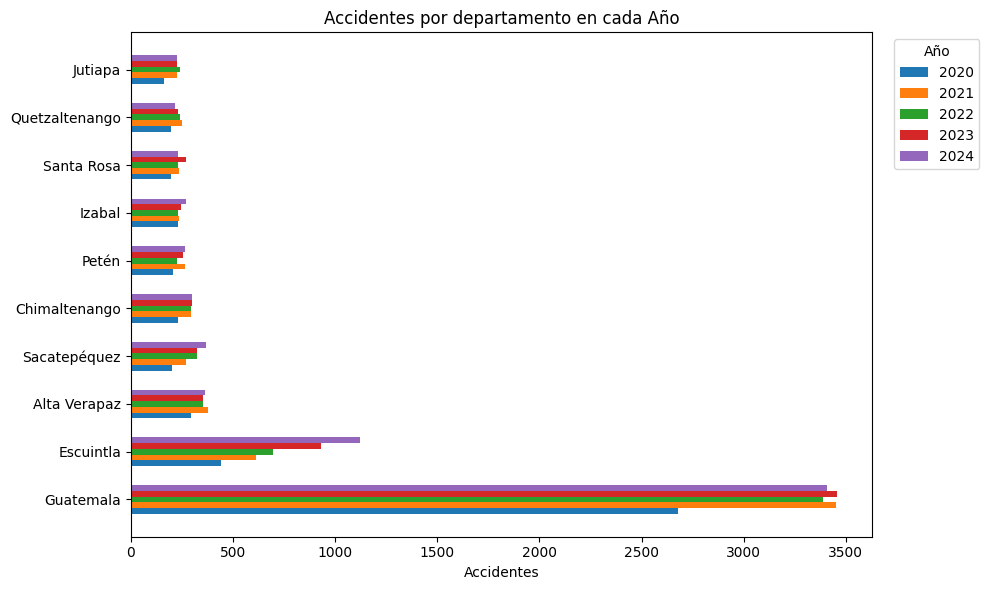

In [22]:
# Top 10 departamentos por TOTAL 
totales = tabla_5.sum(axis=1).sort_values(ascending=False)
top10_dept = totales.head(10).index
data_top10 = tabla_5.loc[top10_dept]

# Gráfica de barras agrupadas
plt.figure(figsize=(10, 6))
y = np.arange(len(data_top10.index))
bar_h = 0.12
offsets = np.linspace(-bar_h*(len(data_top10.columns)-1)/2,
                      bar_h*(len(data_top10.columns)-1)/2,
                      num=len(data_top10.columns))

for i, col in enumerate(data_top10.columns):
    plt.barh(y + offsets[i], data_top10[col].values, height=bar_h, label=str(col))

plt.yticks(y, data_top10.index)
plt.xlabel("Accidentes")
plt.title("Accidentes por departamento en cada Año")
plt.legend(title="Año", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

6. ¿Qué día de la semana registra más accidentes en 2024? Graficar con display en un
gráfico de columnas

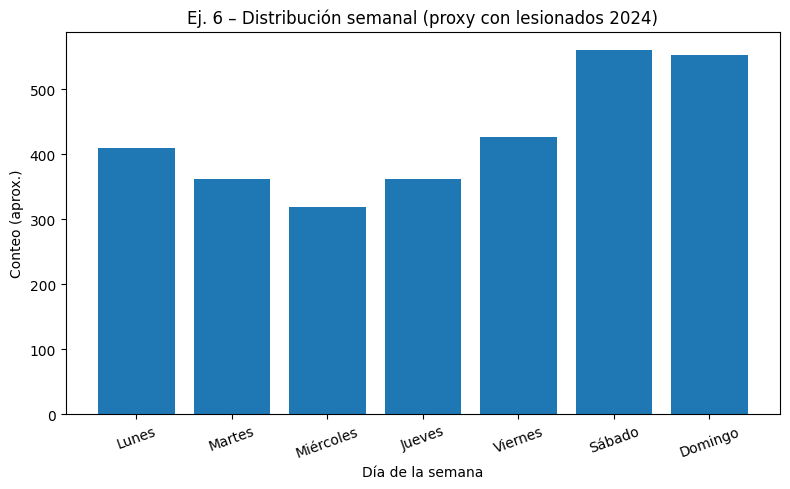

In [29]:
lesionados = pd.read_csv("./lesionados_40.csv")
dias_esperados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
dias_presentes = [c for c in lesionados.columns if c in dias_esperados]
if not dias_presentes:
    raise ValueError("No se encontraron columnas de días")

totales_dias = lesionados[dias_presentes].sum(axis=0).astype(int)
df_dias = totales_dias.reset_index()
df_dias.columns = ["Día", "Conteo"]

# Gráfica
plt.figure(figsize=(8,5))
plt.bar(df_dias["Día"], df_dias["Conteo"])
plt.xlabel("Día de la semana")
plt.ylabel("Conteo (aprox.)")
plt.title("Ej. 6 – Distribución semanal (proxy con lesionados 2024)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

En 2024 el dia que muestra mas accidentes es el dia domingo

7. Mostrar la distribución de accidentes por hora del día en el municipio de 
Guatemala. Graficar en un histograma. 